In [1]:
import awkward as ak
import numpy as np
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import math
import os
from hist.intervals import clopper_pearson_interval

plt.rcParams.update({"font.size": 16})
plt.style.use(hep.style.CMS)

In [2]:
plot_dir = "../../../plots/TriggerSFs/Feb26"
_ = os.system(f"mkdir -p {plot_dir}")

In [3]:
combined = {}
years = ["2016APV", "2016", "2017", "2018"]

for year in years:
    with open(f"trigEffs/{year}_combined.pkl", "rb") as filehandler:
        combined[year] = pickle.load(filehandler)

In [4]:
combined["2017"]

{'den': Hist(
   Variable([0, 0.9, 0.95, 0.98, 1], name='jet1txbb', label='$T_{Xbb}$ Score'),
   Variable([0, 0.9, 0.95, 0.98, 1], name='jet1th4q', label='$T_{H4q}$ Score'),
   Variable([250, 275, 300, 325, 350, 375, 400, 450, 500, 600, 800, 1000], name='jet1pt', label='$p_T$ (GeV)'),
   Regular(15, 0, 300, name='jet1msd', label='$m_{SD}$ (GeV)'),
   storage=Double()) # Sum: 1114034.0 (3911097.0 with flow),
 'num': Hist(
   Variable([0, 0.9, 0.95, 0.98, 1], name='jet1txbb', label='$T_{Xbb}$ Score'),
   Variable([0, 0.9, 0.95, 0.98, 1], name='jet1th4q', label='$T_{H4q}$ Score'),
   Variable([250, 275, 300, 325, 350, 375, 400, 450, 500, 600, 800, 1000], name='jet1pt', label='$p_T$ (GeV)'),
   Regular(15, 0, 300, name='jet1msd', label='$m_{SD}$ (GeV)'),
   storage=Double()) # Sum: 152849.0 (156559.0 with flow),
 'cutflow': OrderedDict([('all', 742490867),
              ('muon', 314211610),
              ('ak8_jet', 4064792)])}

In [5]:
effs_txbb = {
    year: combined[year]["num"][:, sum, :, :] / combined[year]["den"][:, sum, :, :]
    for year in years
}
effs_th4q = {
    year: combined[year]["num"][sum, :, :, :] / combined[year]["den"][sum, :, :, :]
    for year in years
}

In [6]:
errors_txbb = {}
intervals_txbb = {}
errors_th4q = {}
intervals_th4q = {}

for year in years:
    intervals = clopper_pearson_interval(
        combined[year]["num"][:, sum, :, :].view(flow=False),
        combined[year]["den"][:, sum, :, :].view(flow=False),
    )
    errors_txbb[year] = (intervals[1] - intervals[0]) / 2
    intervals_txbb[year] = intervals

    intervals = clopper_pearson_interval(
        combined[year]["num"][sum, :, :, :].view(flow=False),
        combined[year]["den"][sum, :, :, :].view(flow=False),
    )
    errors_th4q[year] = (intervals[1] - intervals[0]) / 2
    intervals_th4q[year] = intervals

In [23]:
for year in years:
    w, jet1txbbbins, jet1ptbins, jet1msdbins = effs_txbb[year].to_numpy()

    for k in range(len(jet1txbbbins) - 1):
        fig, ax = plt.subplots(figsize=(18, 14))
        mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="turbo", vmin=0, vmax=1)
        for i in range(len(jet1ptbins) - 1):
            for j in range(len(jet1msdbins) - 1):
                if not math.isnan(w[k][i, j]):
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        w[k][i, j].round(2),
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

        ax.set_title(
            f"{year}: {jet1txbbbins[k]:.2f} < $T_{{Xbb}}$ Score < {jet1txbbbins[k + 1]:.2f}"
        )
        ax.set_xlabel("Jet 1 MassSD (GeV)")
        ax.set_ylabel("Jet 1 $p_T$ (GeV)")
        plt.colorbar(mesh, ax=ax)
        plt.savefig(
            f"{plot_dir}/{year}_txbb_{jet1txbbbins[k]:.2f}_{jet1txbbbins[k + 1]:.2f}_effs.pdf",
            bbox_inches="tight",
        )
        plt.close()

In [9]:
for year in years:
    w, jet1th4qbins, jet1ptbins, jet1msdbins = effs_th4q[year].to_numpy()

    for k in range(len(jet1th4qbins) - 1):
        fig, ax = plt.subplots(figsize=(18, 14))
        mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="turbo", vmin=0, vmax=1)
        for i in range(len(jet1ptbins) - 1):
            for j in range(len(jet1msdbins) - 1):
                if not math.isnan(w[k][i, j]):
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        w[k][i, j].round(2),
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

        ax.set_title(
            f"{year}: {jet1th4qbins[k]:.2f} < $T_{{H4q}}$ Score < {jet1th4qbins[k + 1]:.2f}"
        )
        ax.set_xlabel("Jet 1 MassSD (GeV)")
        ax.set_ylabel("Jet 1 $p_T$ (GeV)")
        plt.colorbar(mesh, ax=ax)
        plt.savefig(
            f"{plot_dir}/{year}_th4q_{jet1th4qbins[k]:.2f}_{jet1th4qbins[k + 1]:.2f}_effs.pdf",
            bbox_inches="tight",
        )
        plt.close()

### Plot in same figure

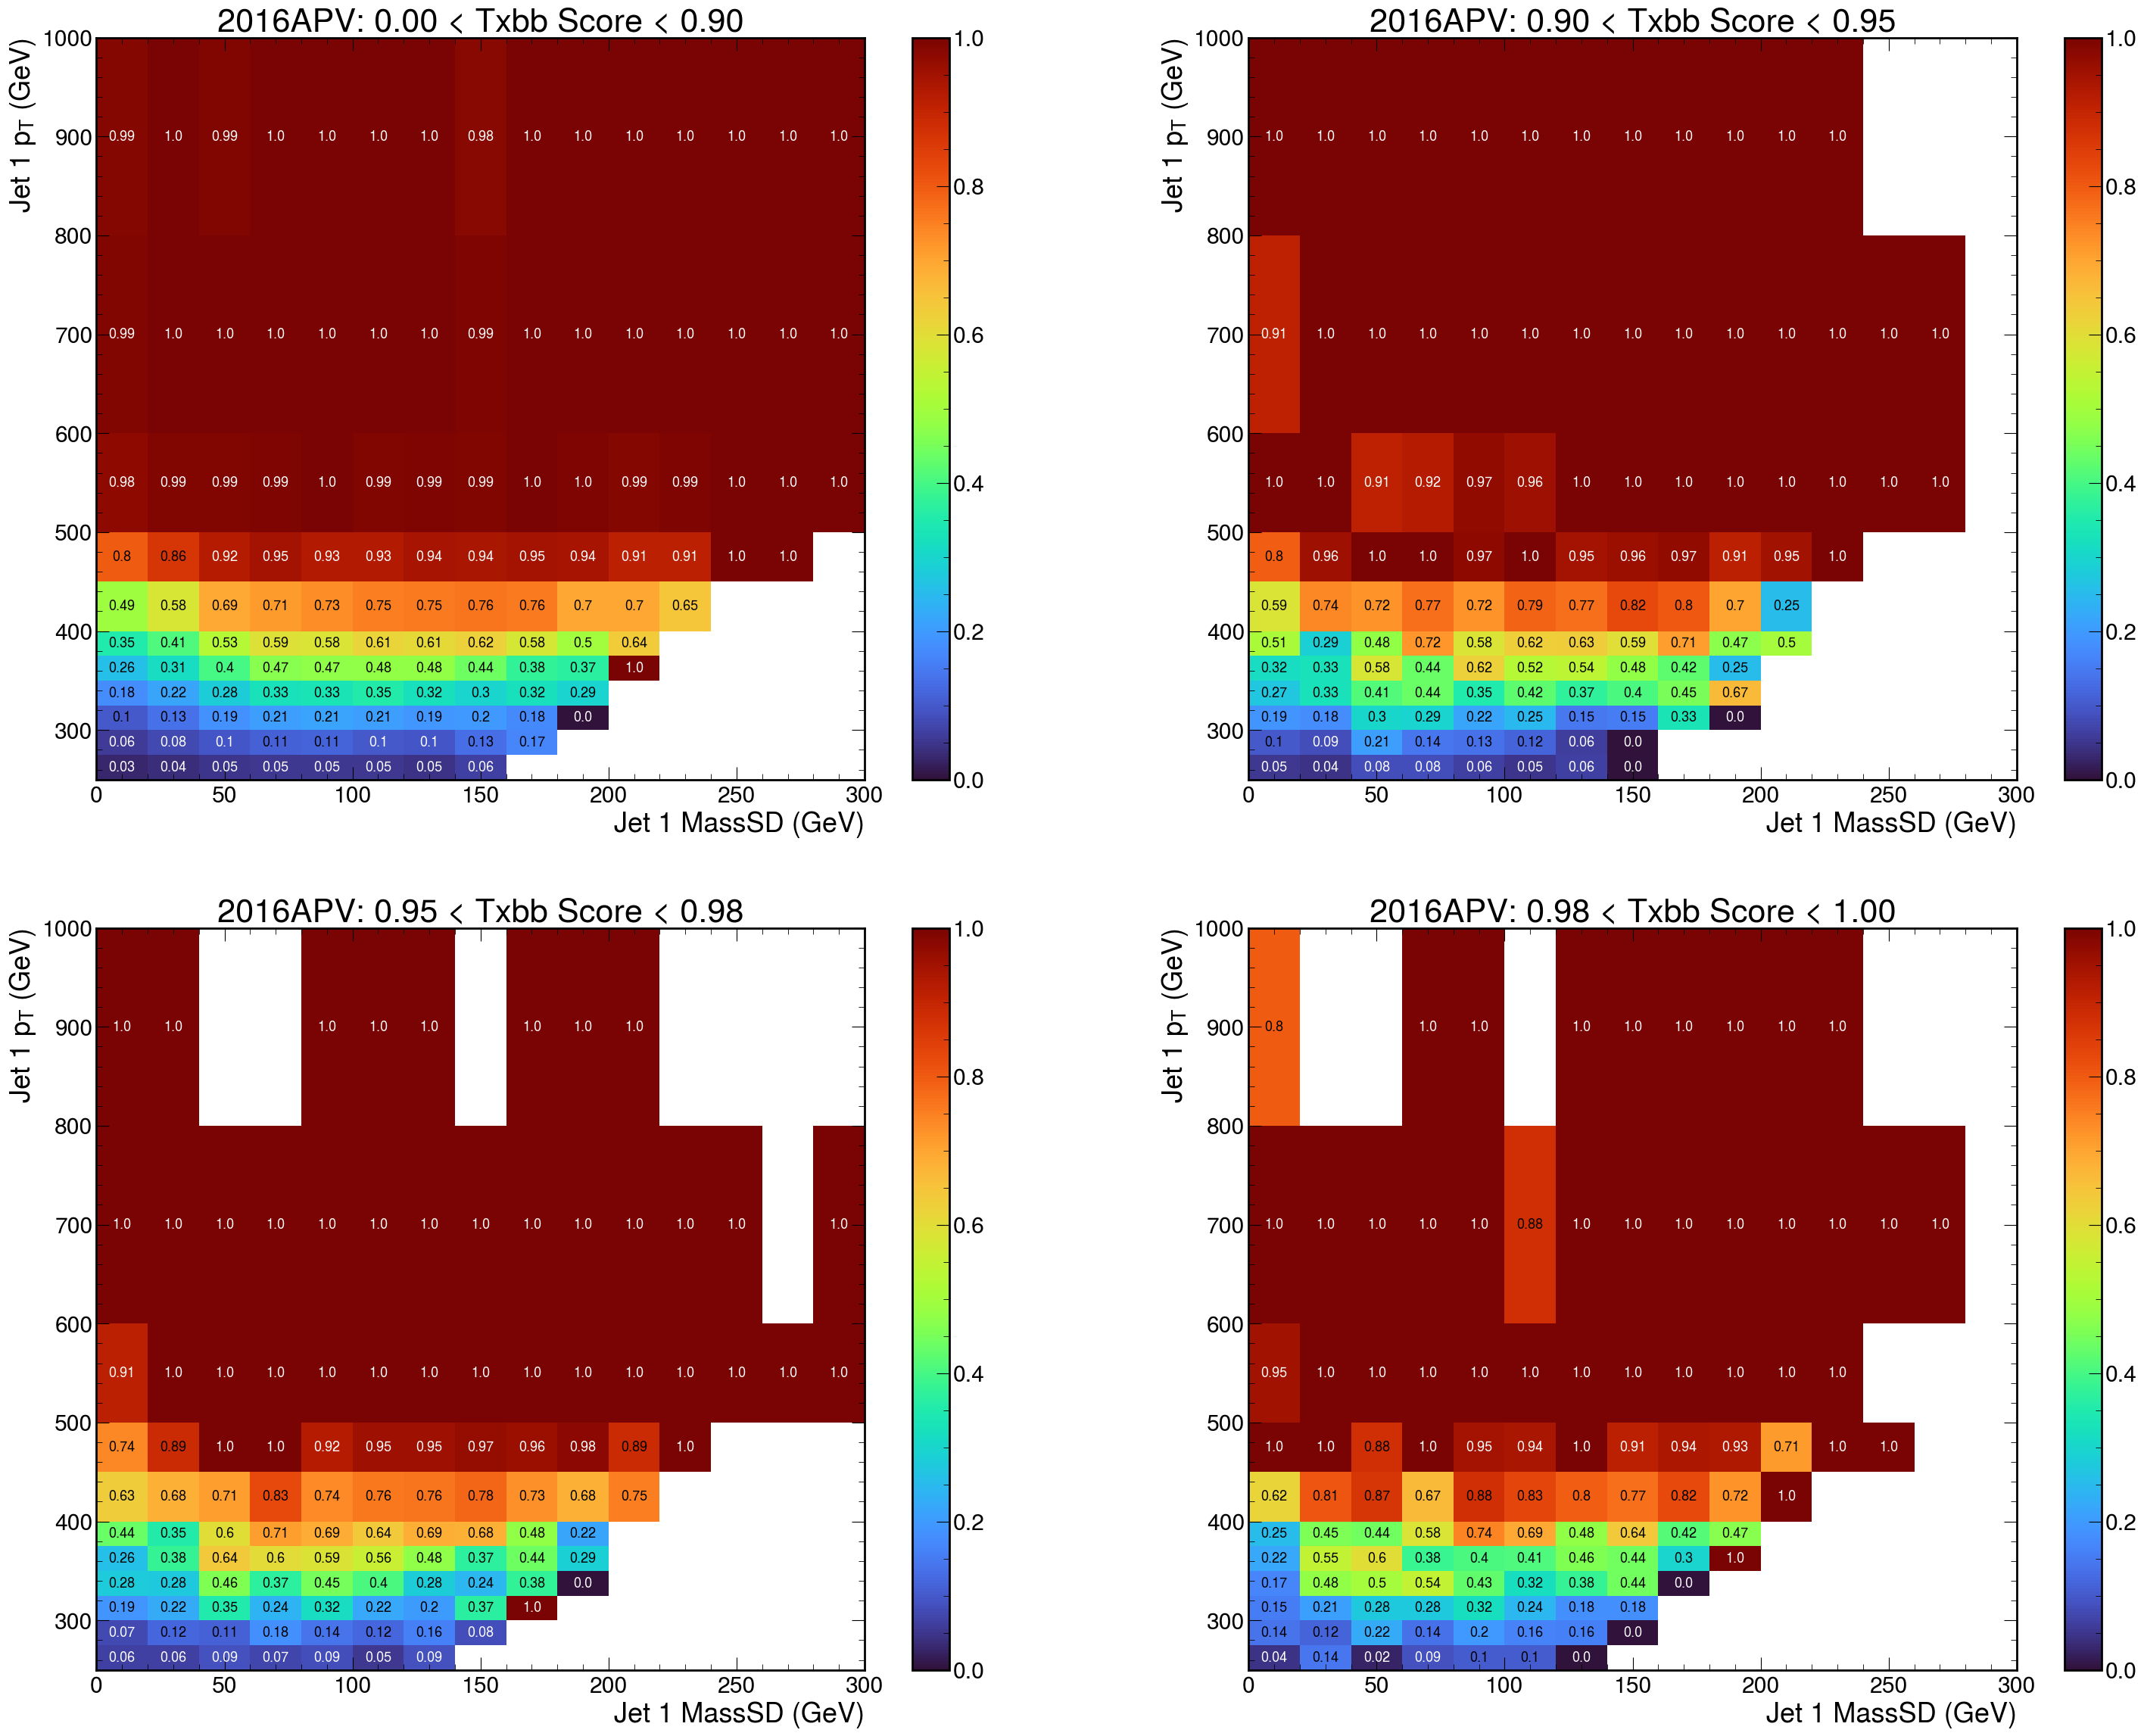

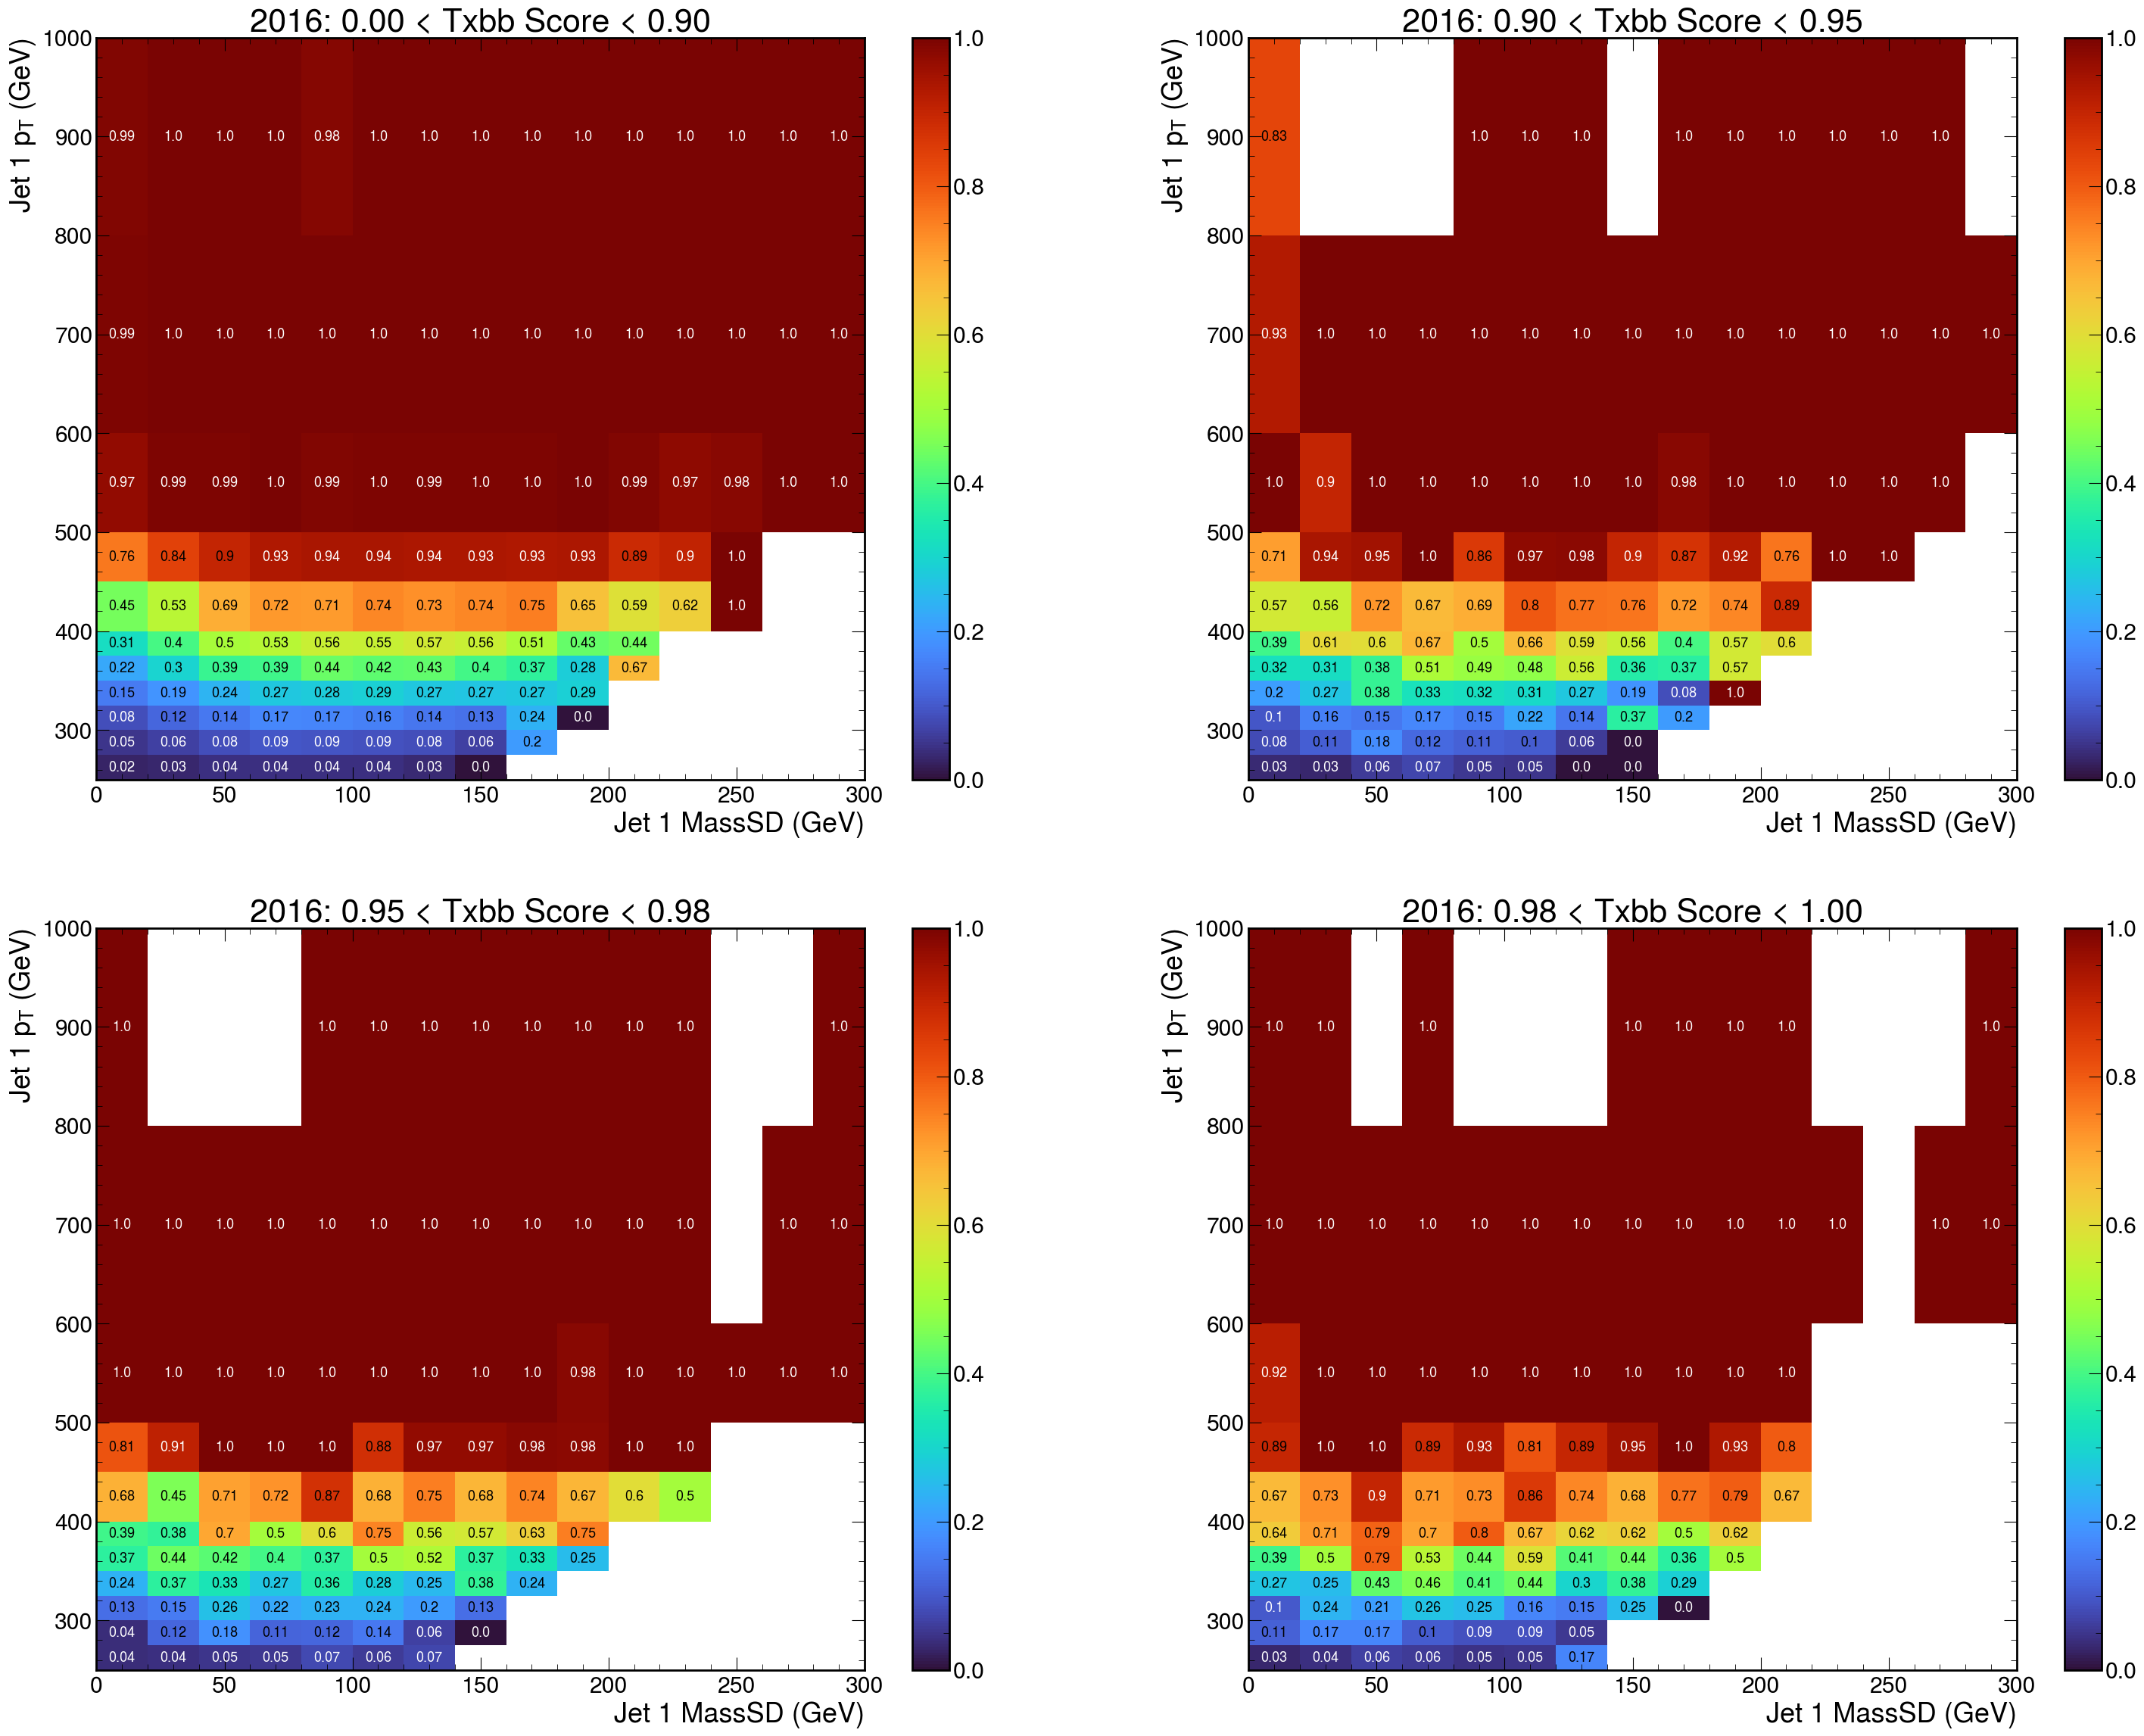

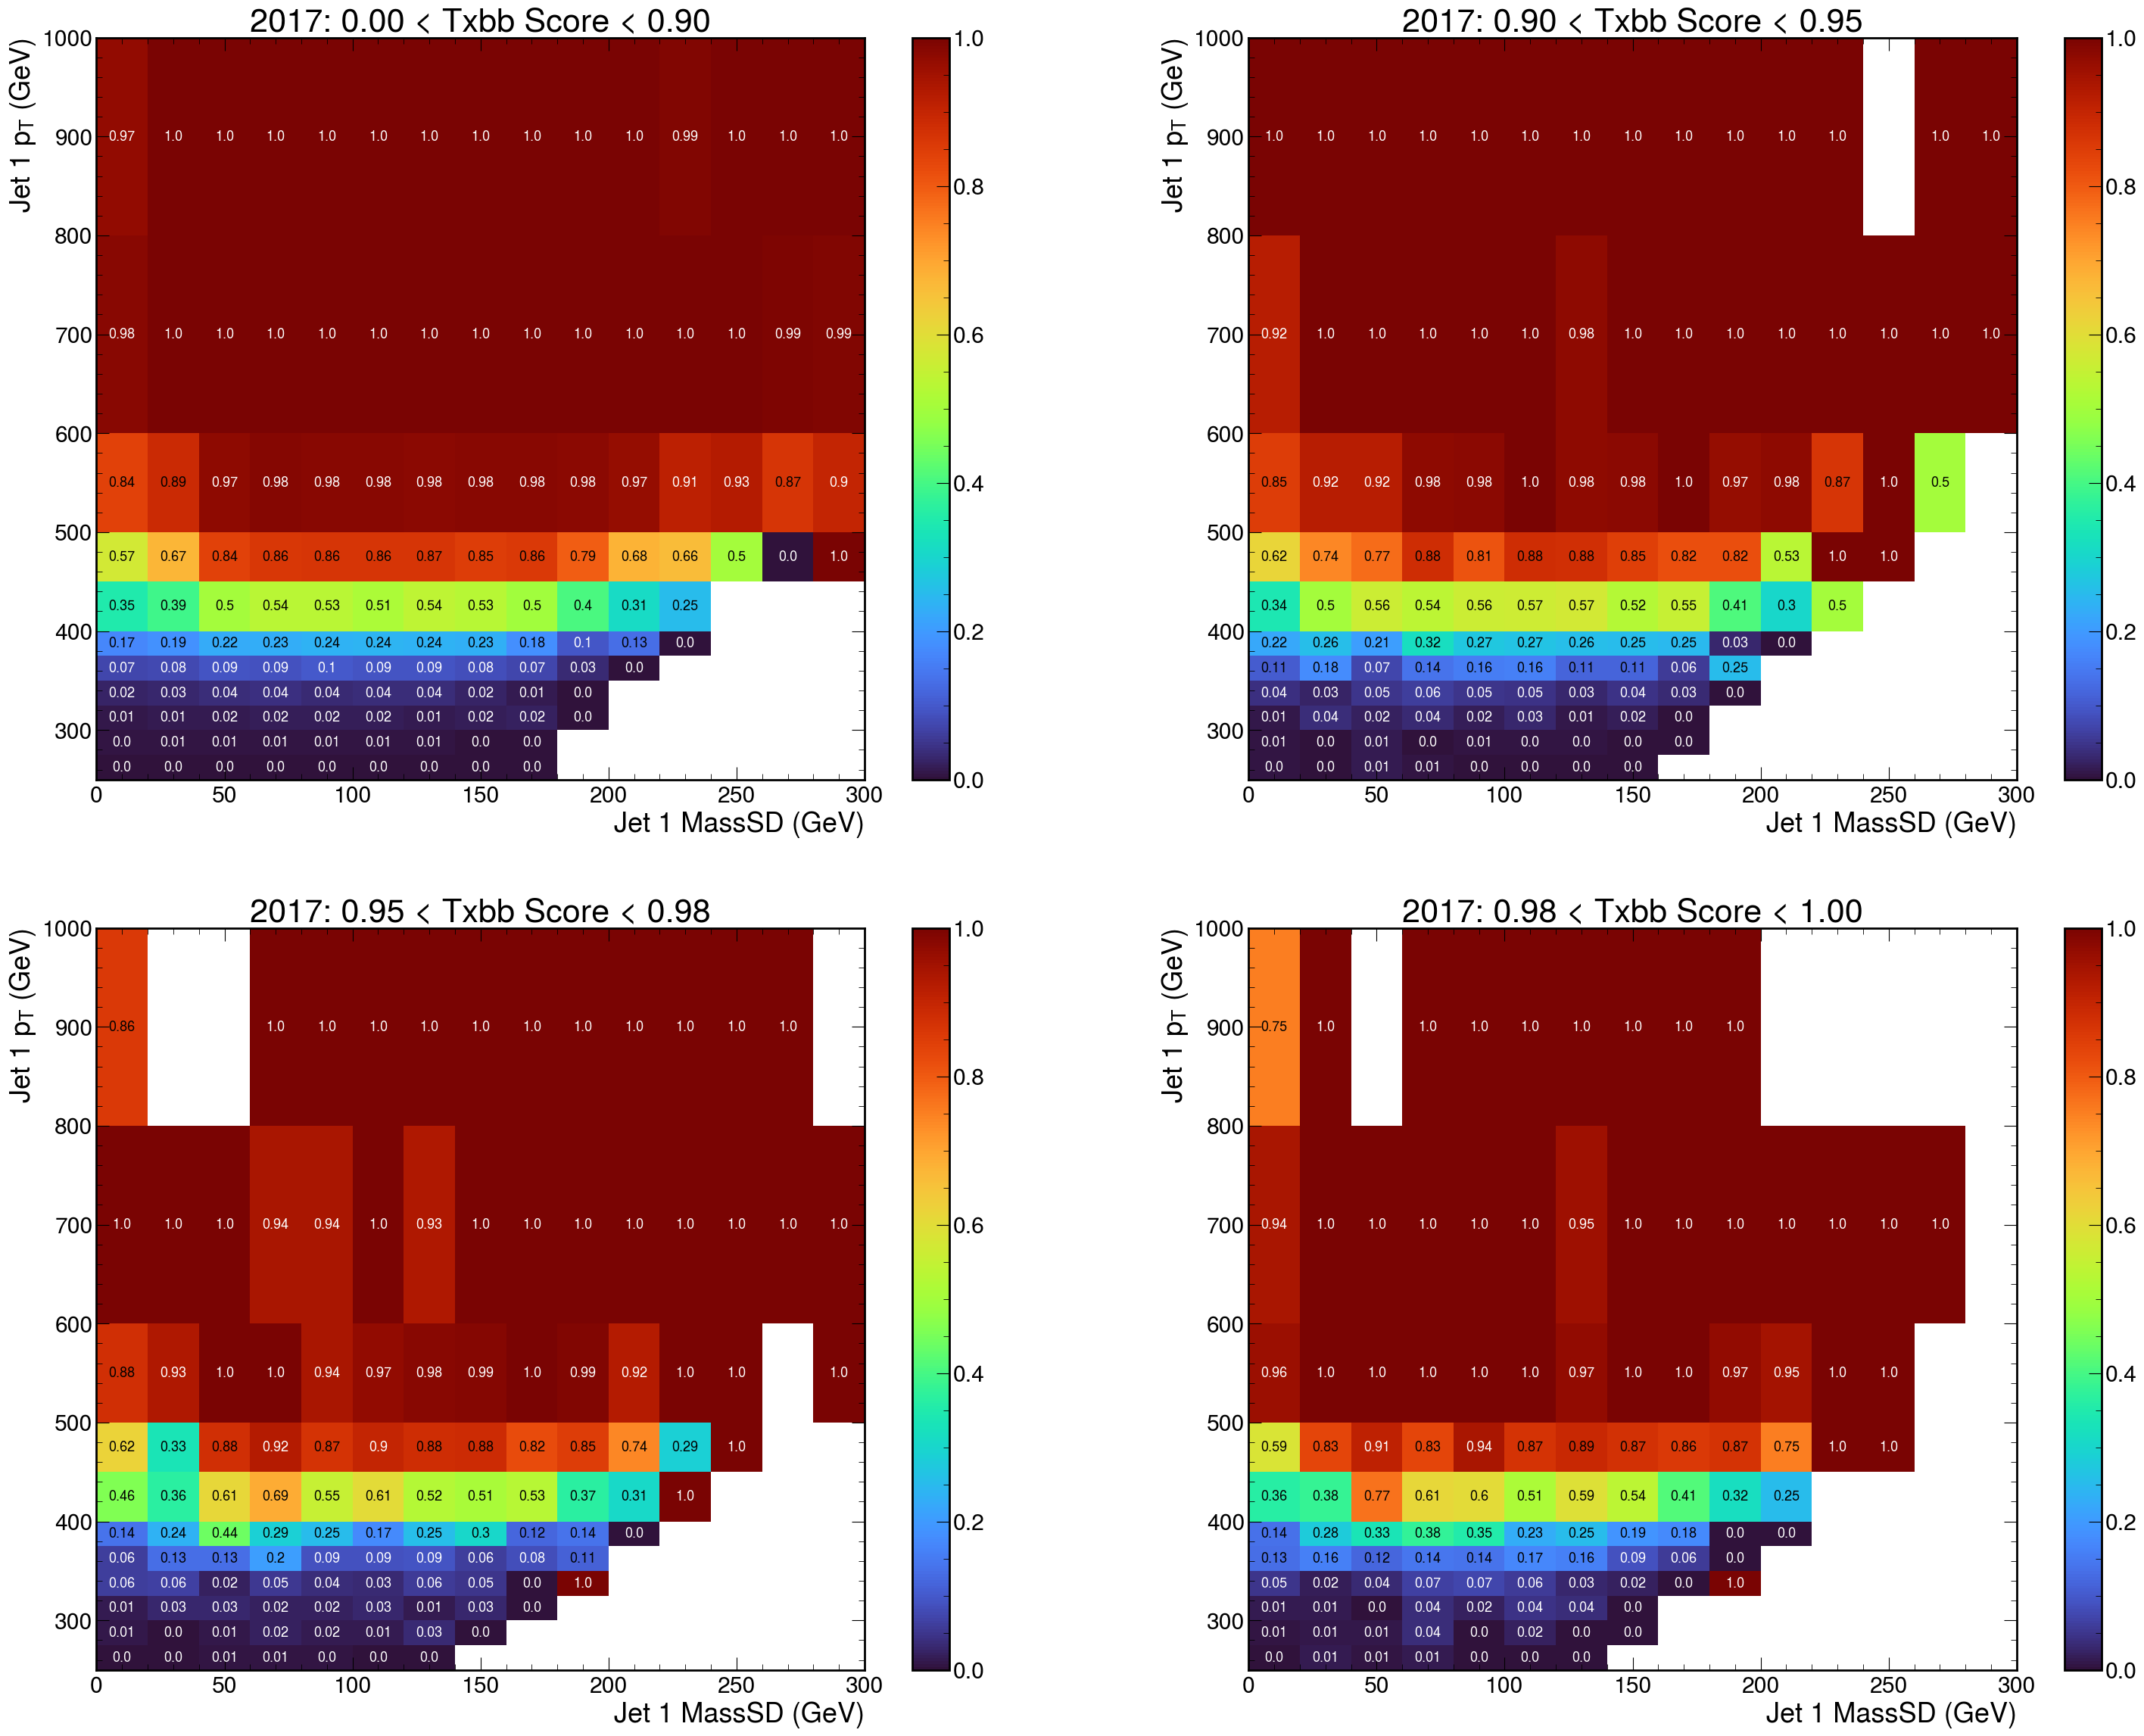

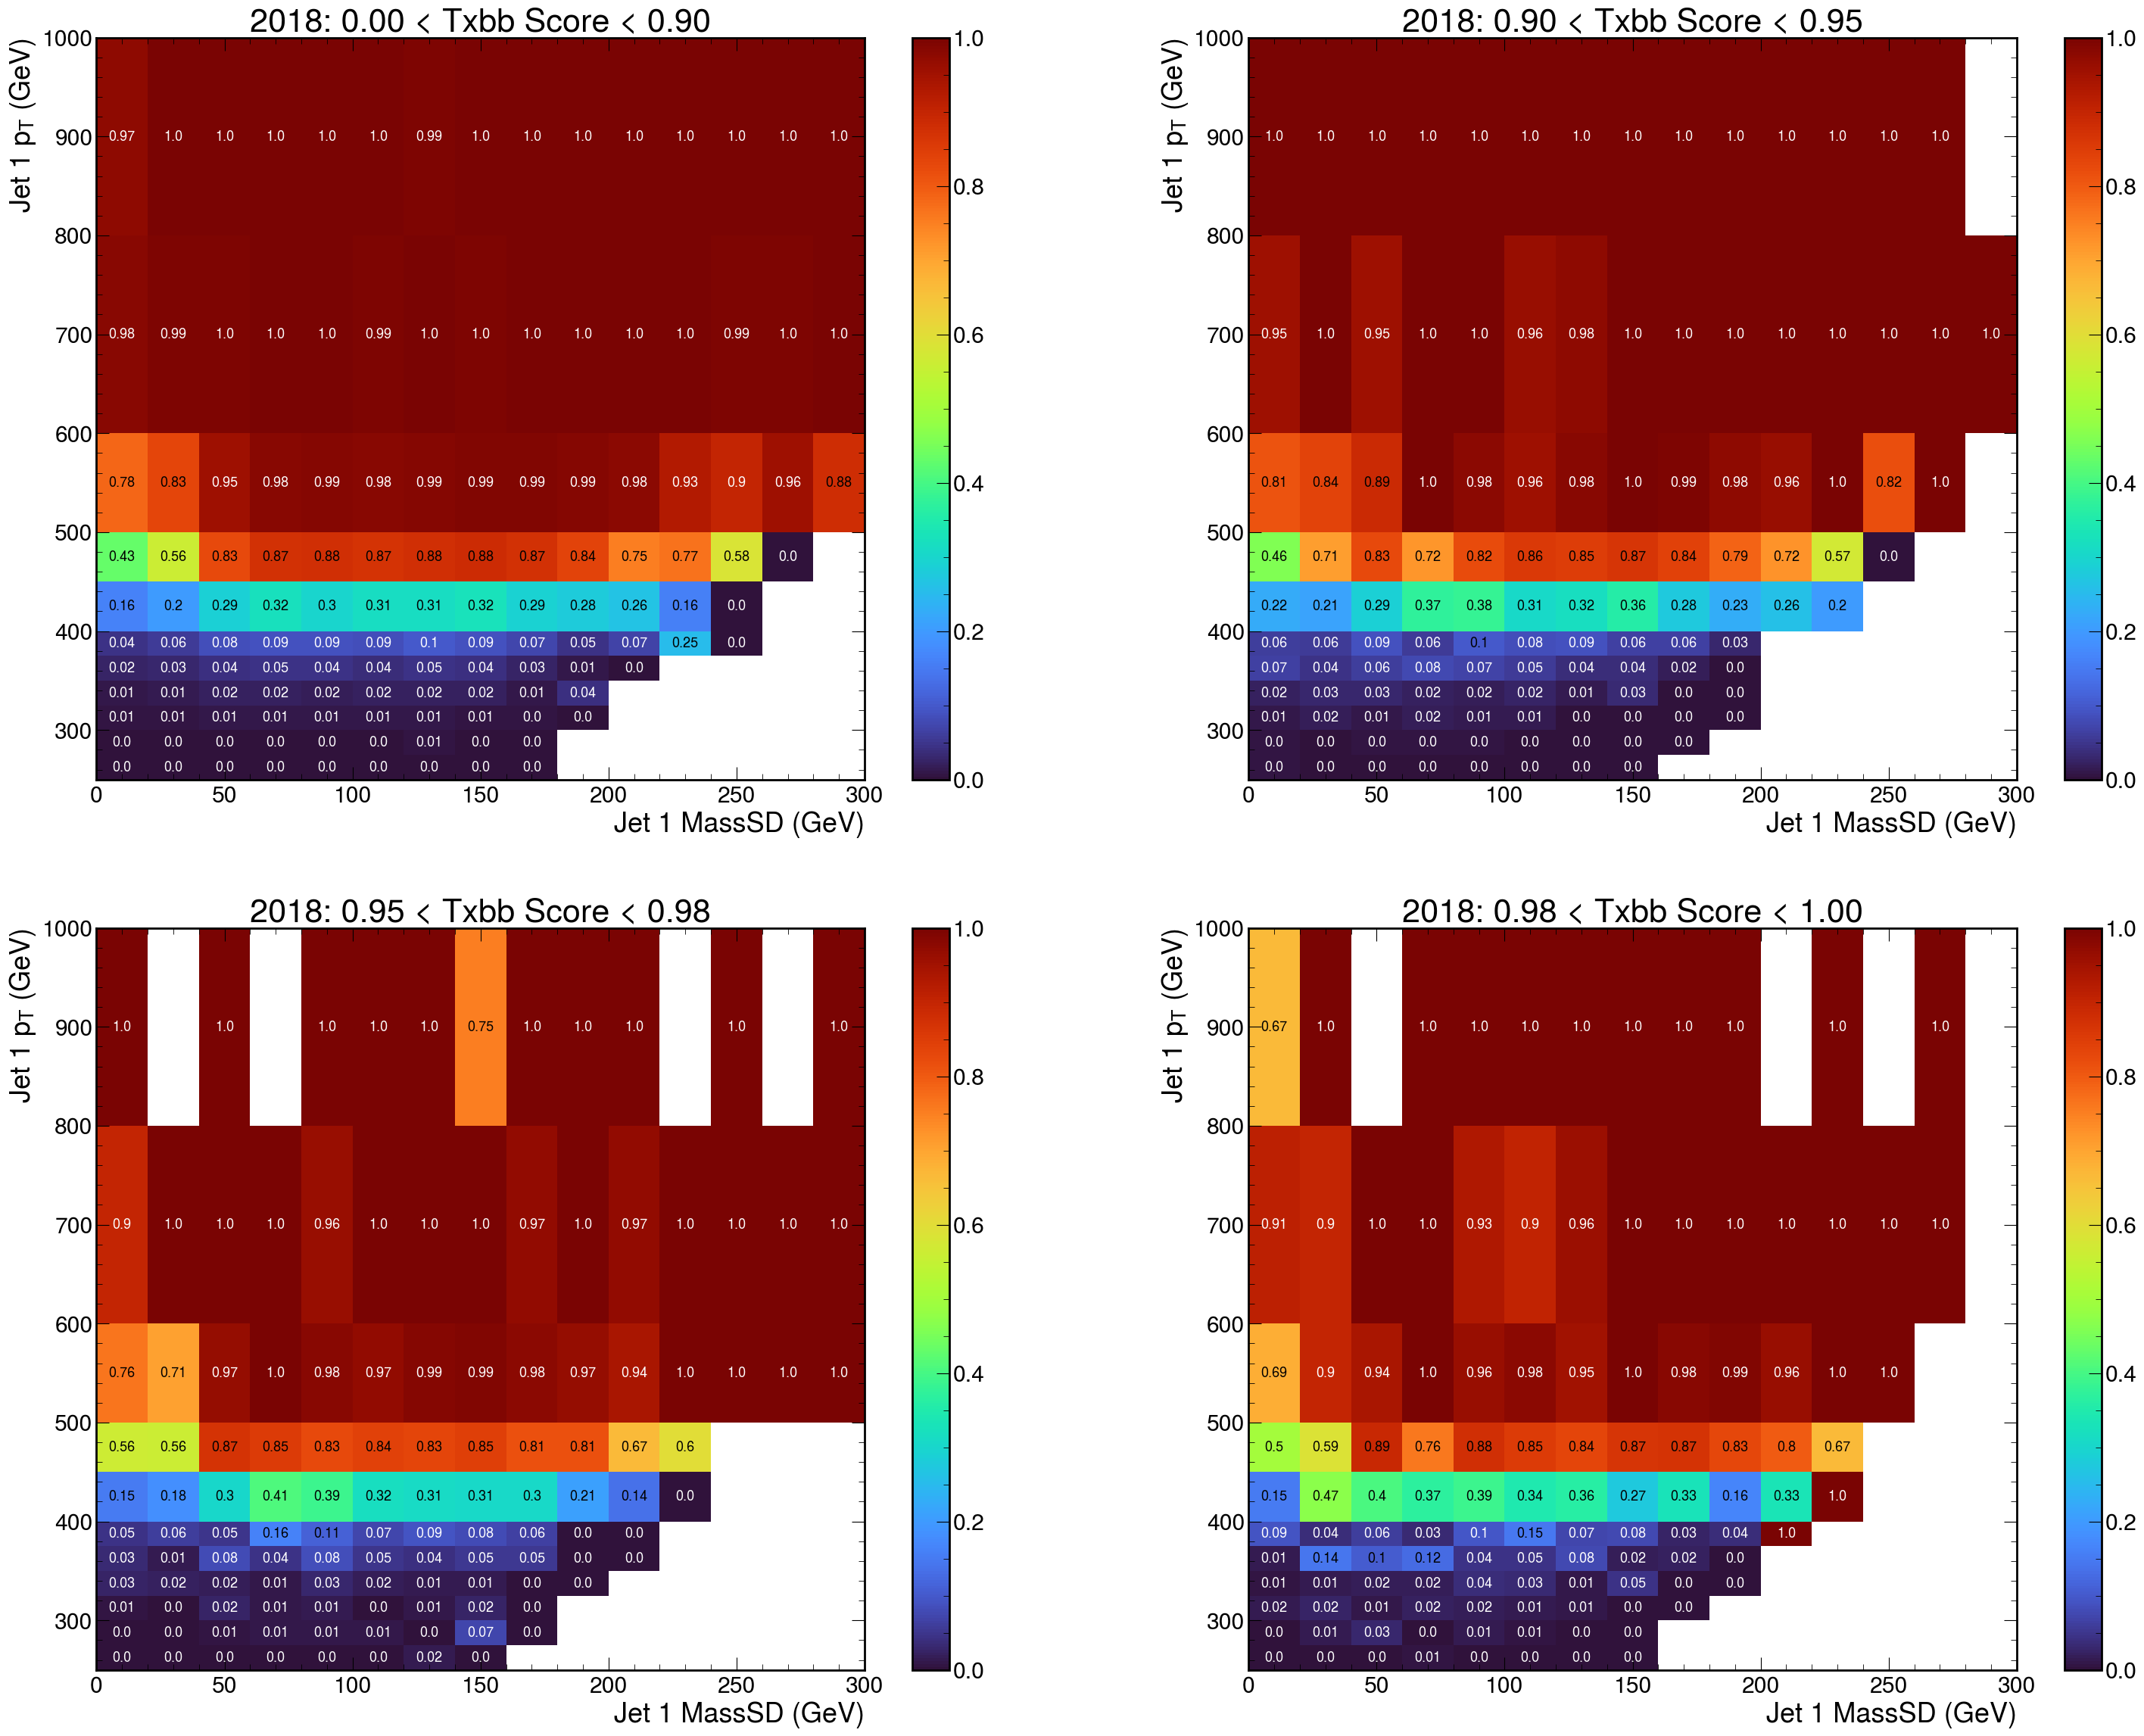

In [13]:
for year in years:
    w, jet1txbbbins, jet1ptbins, jet1msdbins = effs_txbb[year].to_numpy()

    fig, axs = plt.subplots(2, 2, figsize=(18 * 2, 14 * 2))

    for k in range(len(jet1txbbbins) - 1):
        row = k // 2
        col = k % 2
        ax = axs[row][col]

        mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="turbo", vmin=0, vmax=1)
        for i in range(len(jet1ptbins) - 1):
            for j in range(len(jet1msdbins) - 1):
                if not math.isnan(w[k][i, j]):
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        w[k][i, j].round(2),
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=13,
                    )

        ax.set_title(f"{year}: {jet1txbbbins[k]:.2f} < Txbb Score < {jet1txbbbins[k + 1]:.2f}")
        ax.set_xlabel("Jet 1 MassSD (GeV)")
        ax.set_ylabel("Jet 1 $p_T$ (GeV)")
        plt.colorbar(mesh, ax=ax)

    plt.savefig(
        f"{plot_dir}/{year}_txbb_effs.pdf",
        bbox_inches="tight",
    )
    # plt.close()

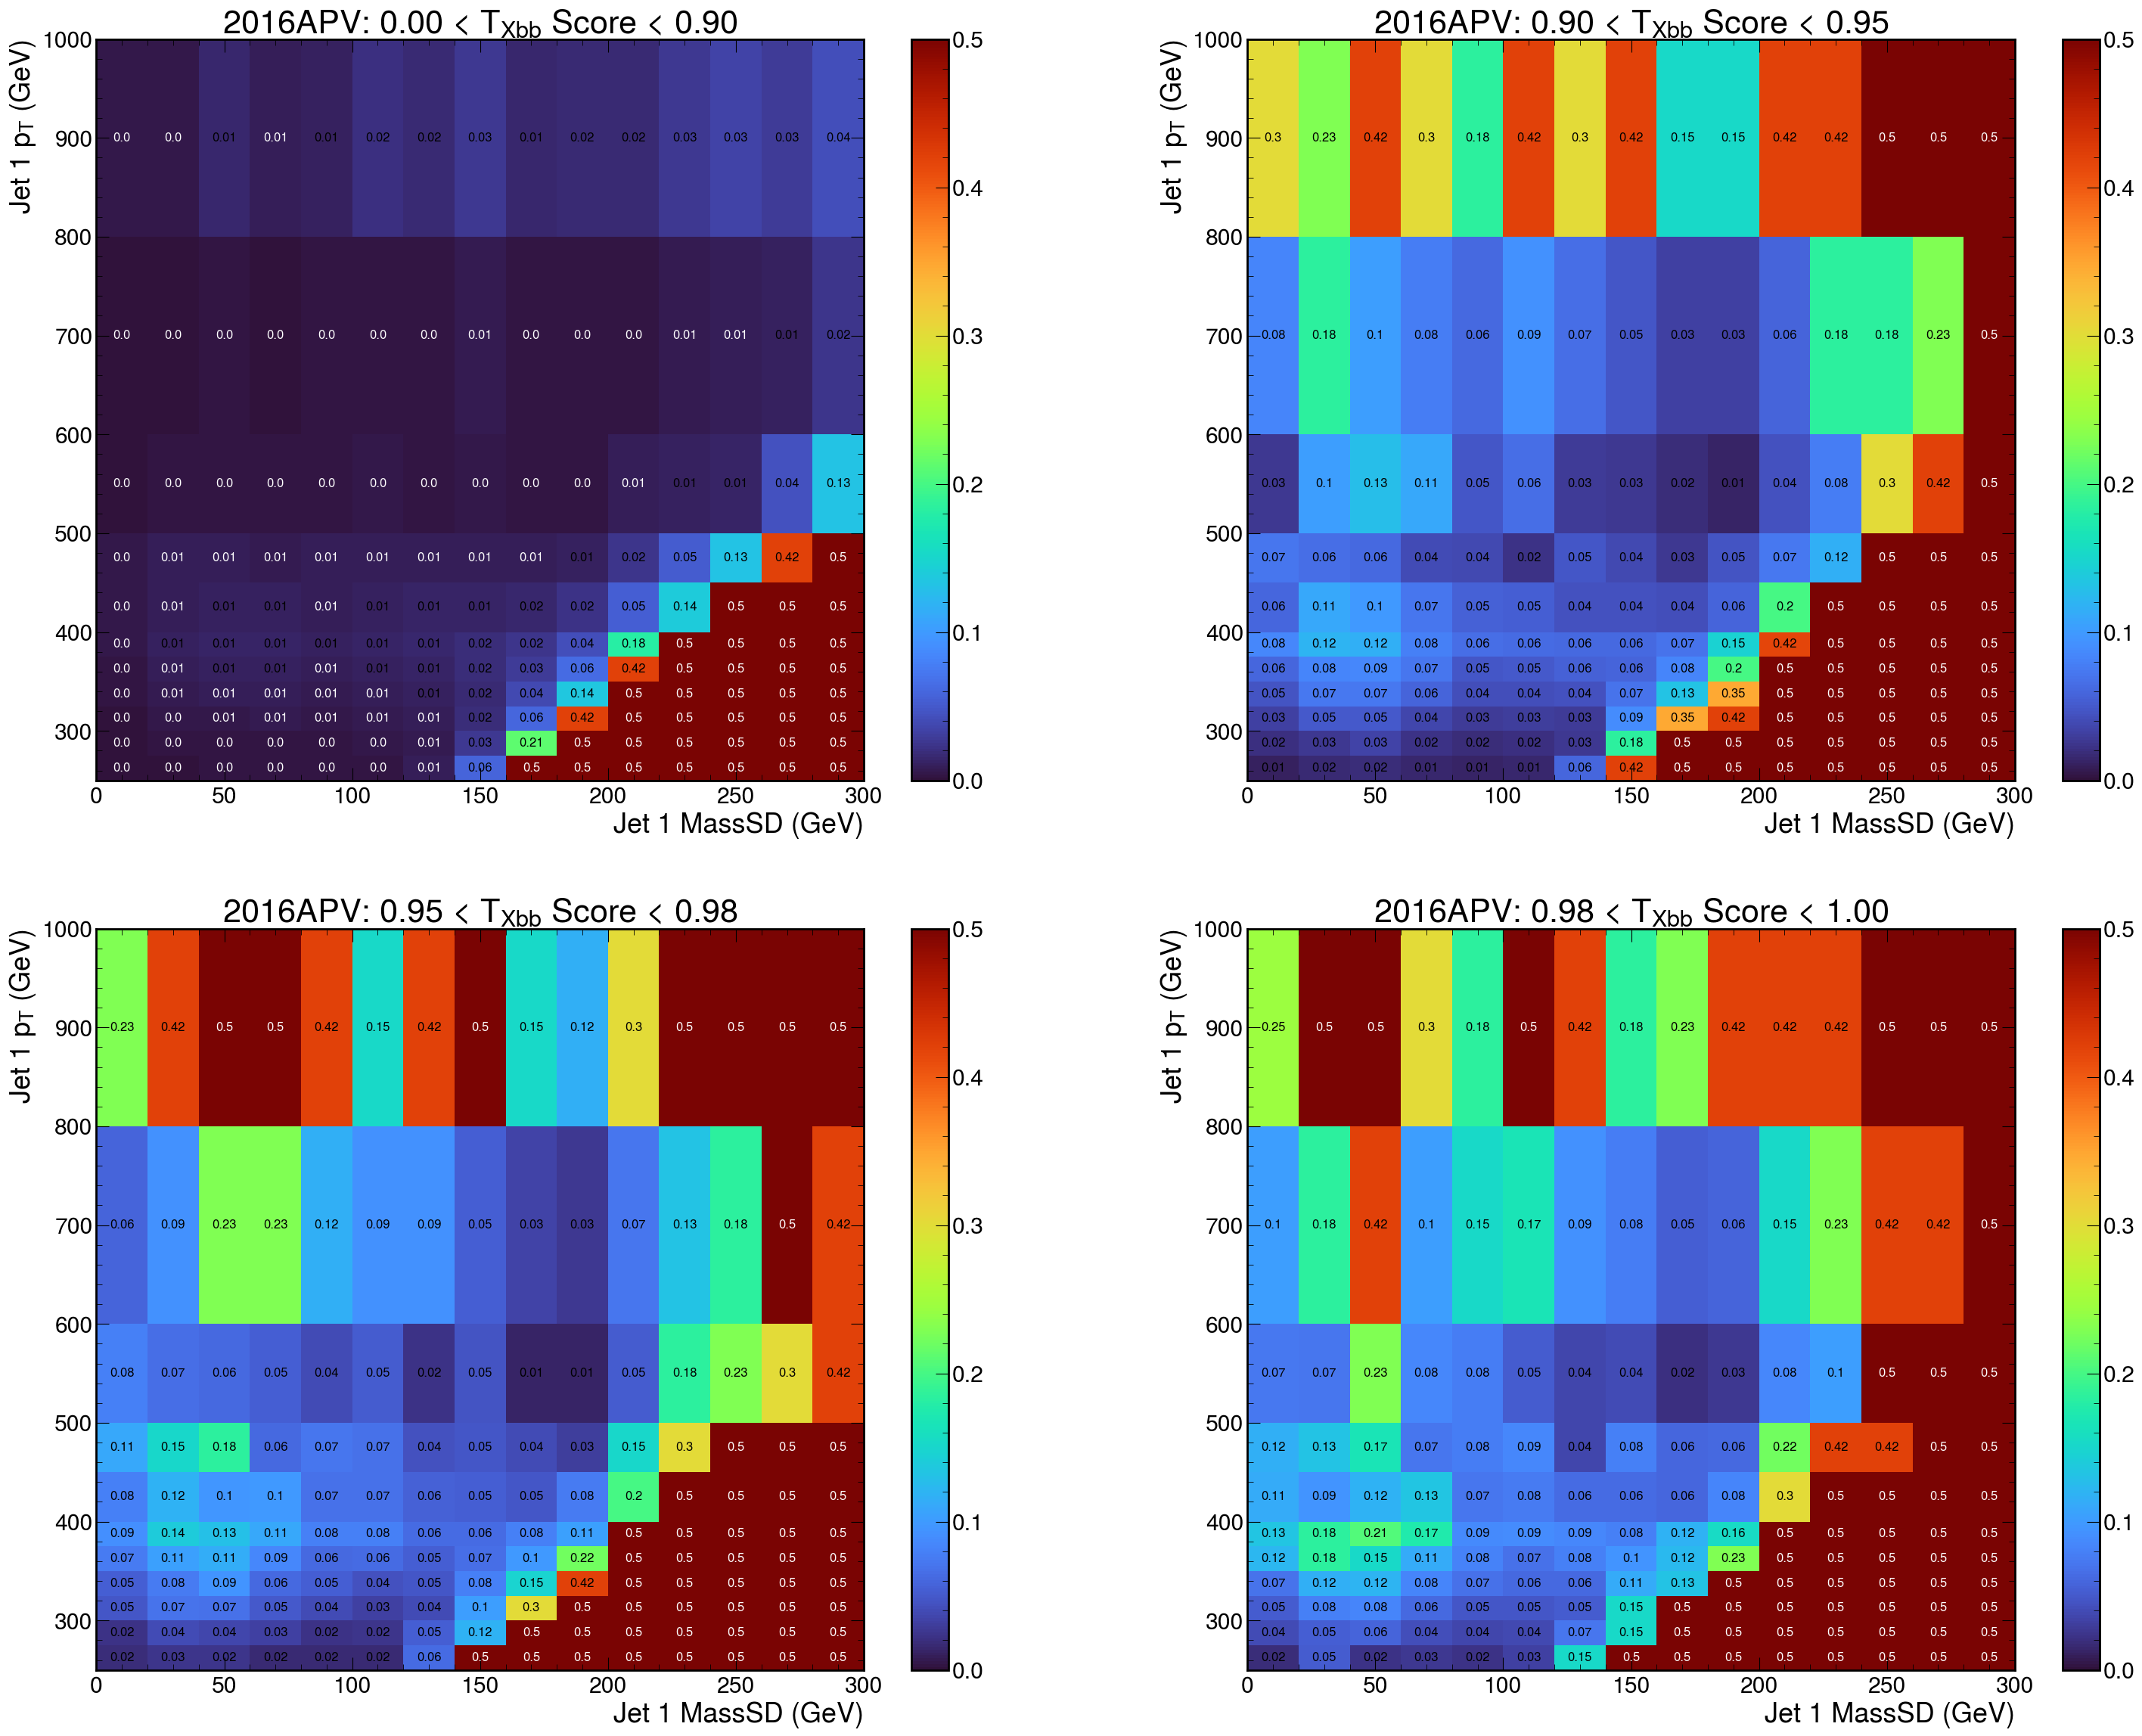

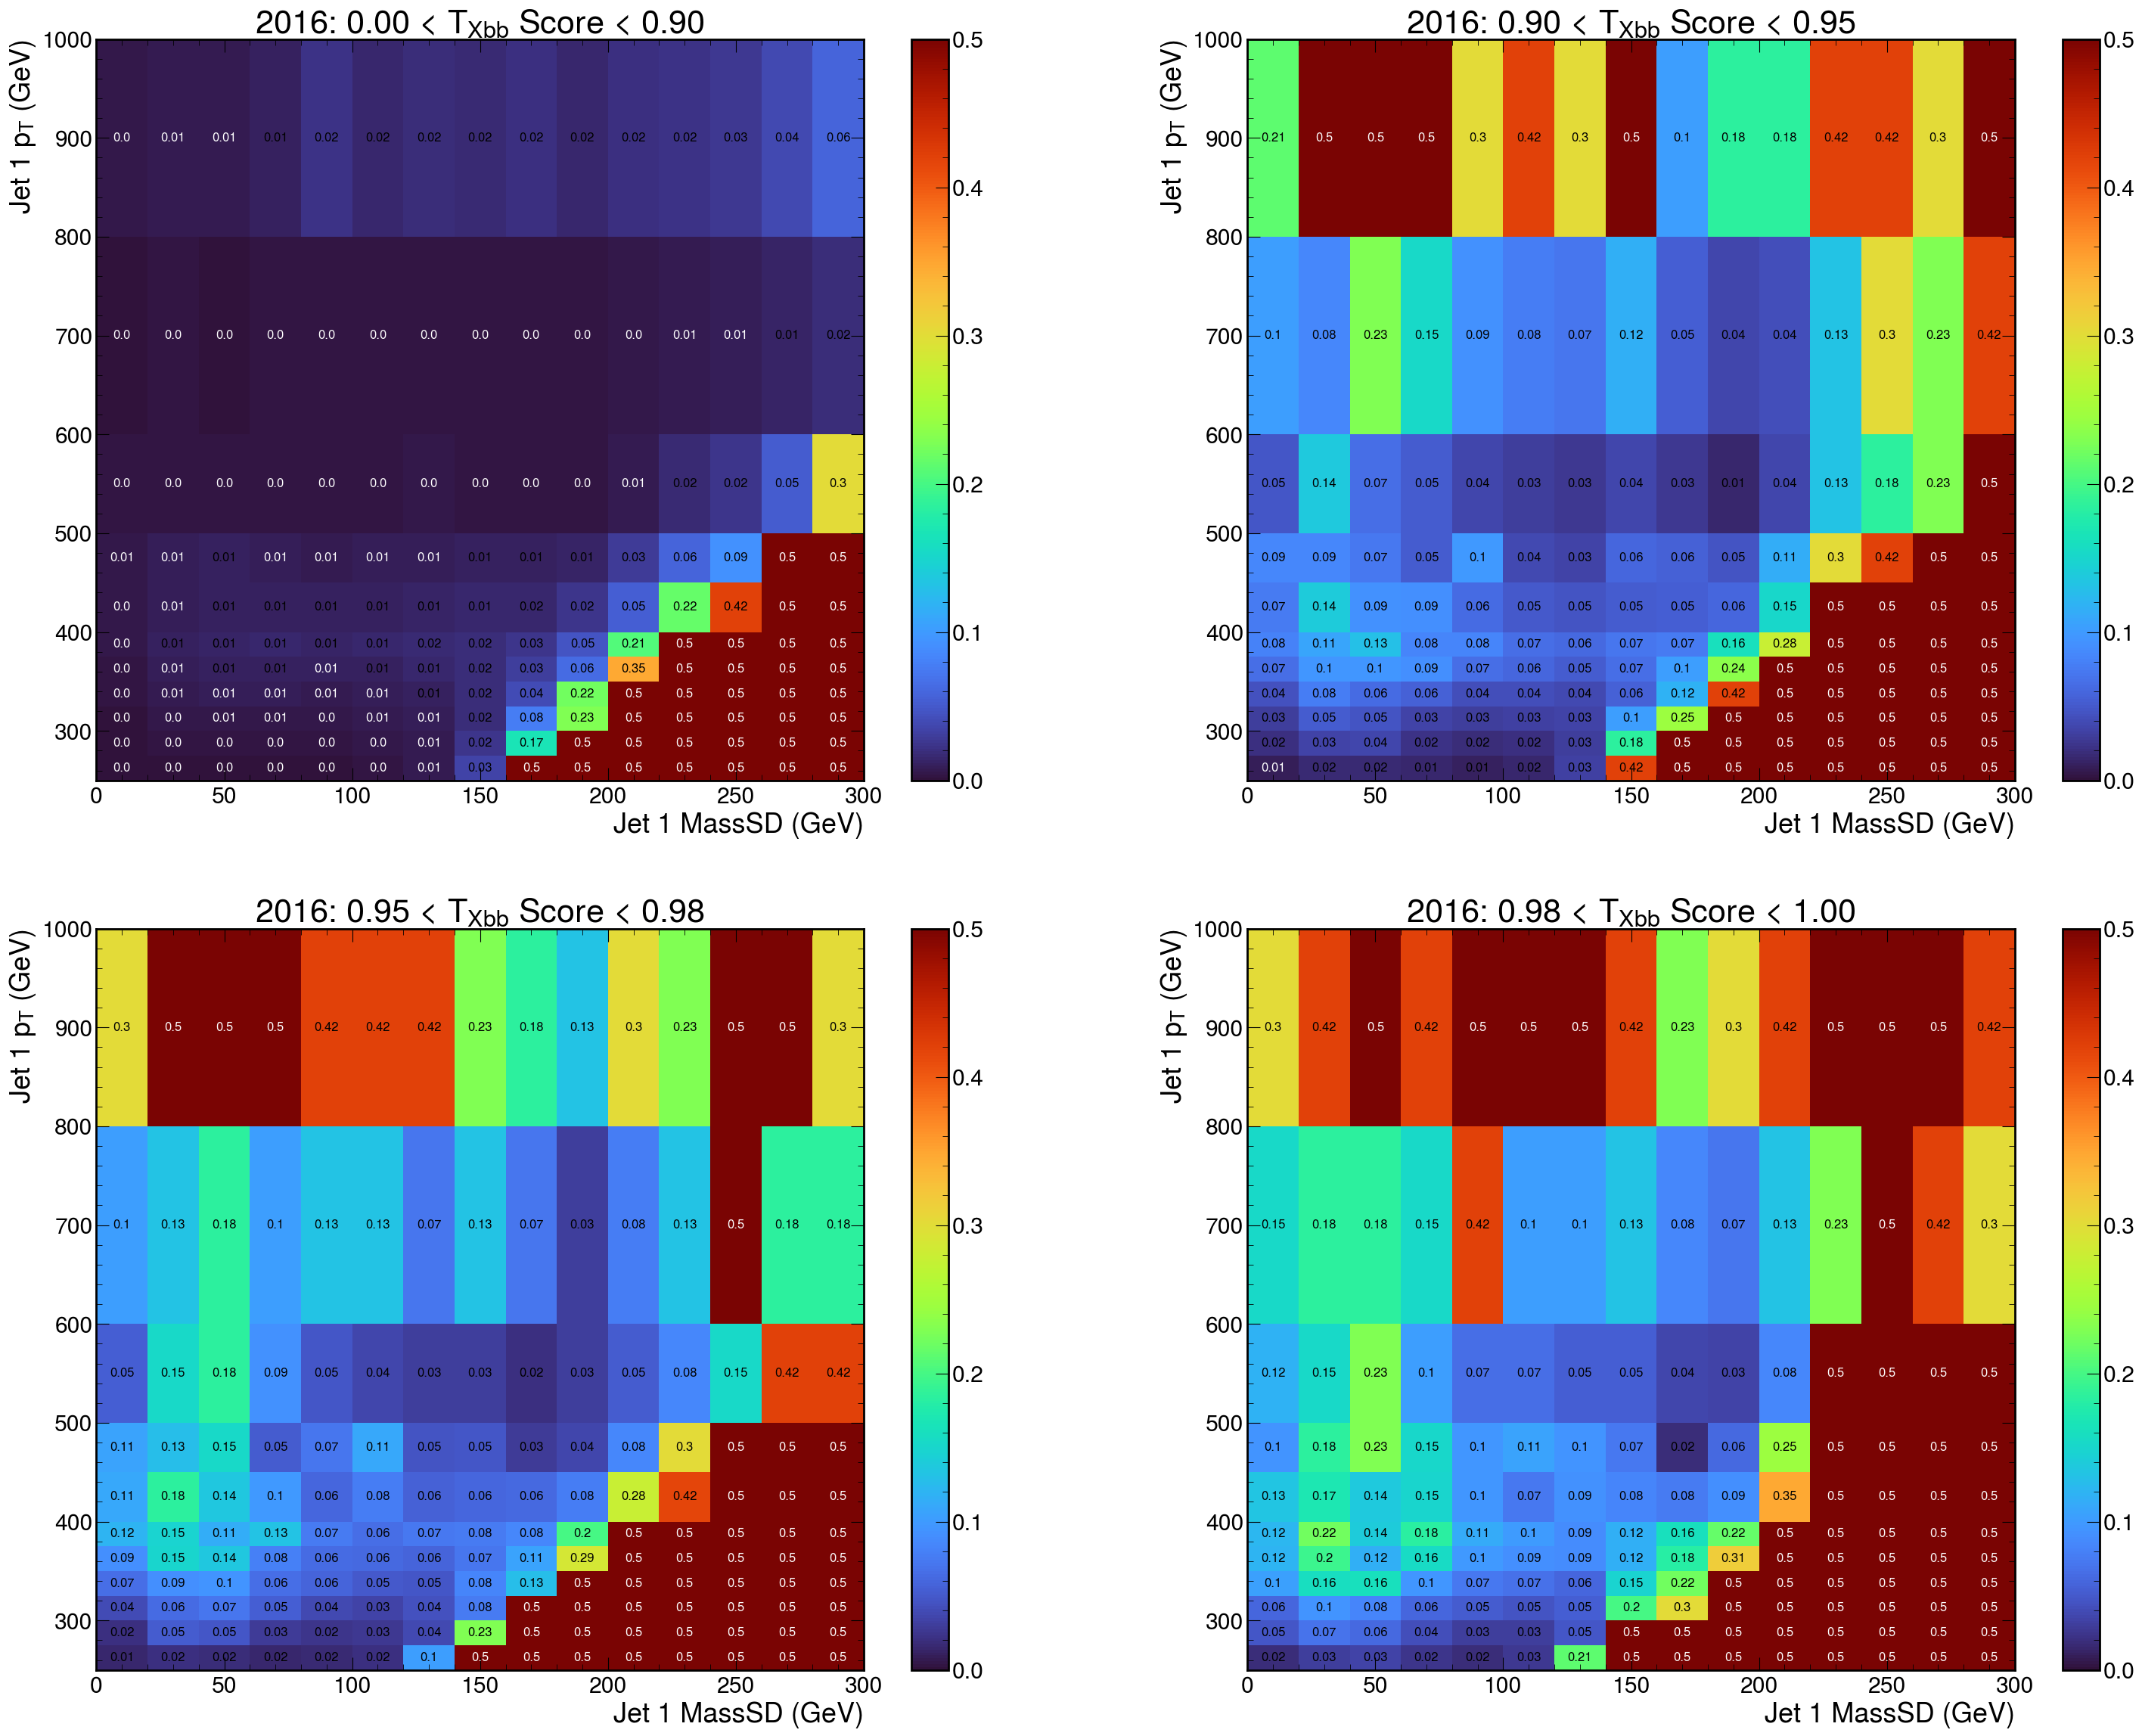

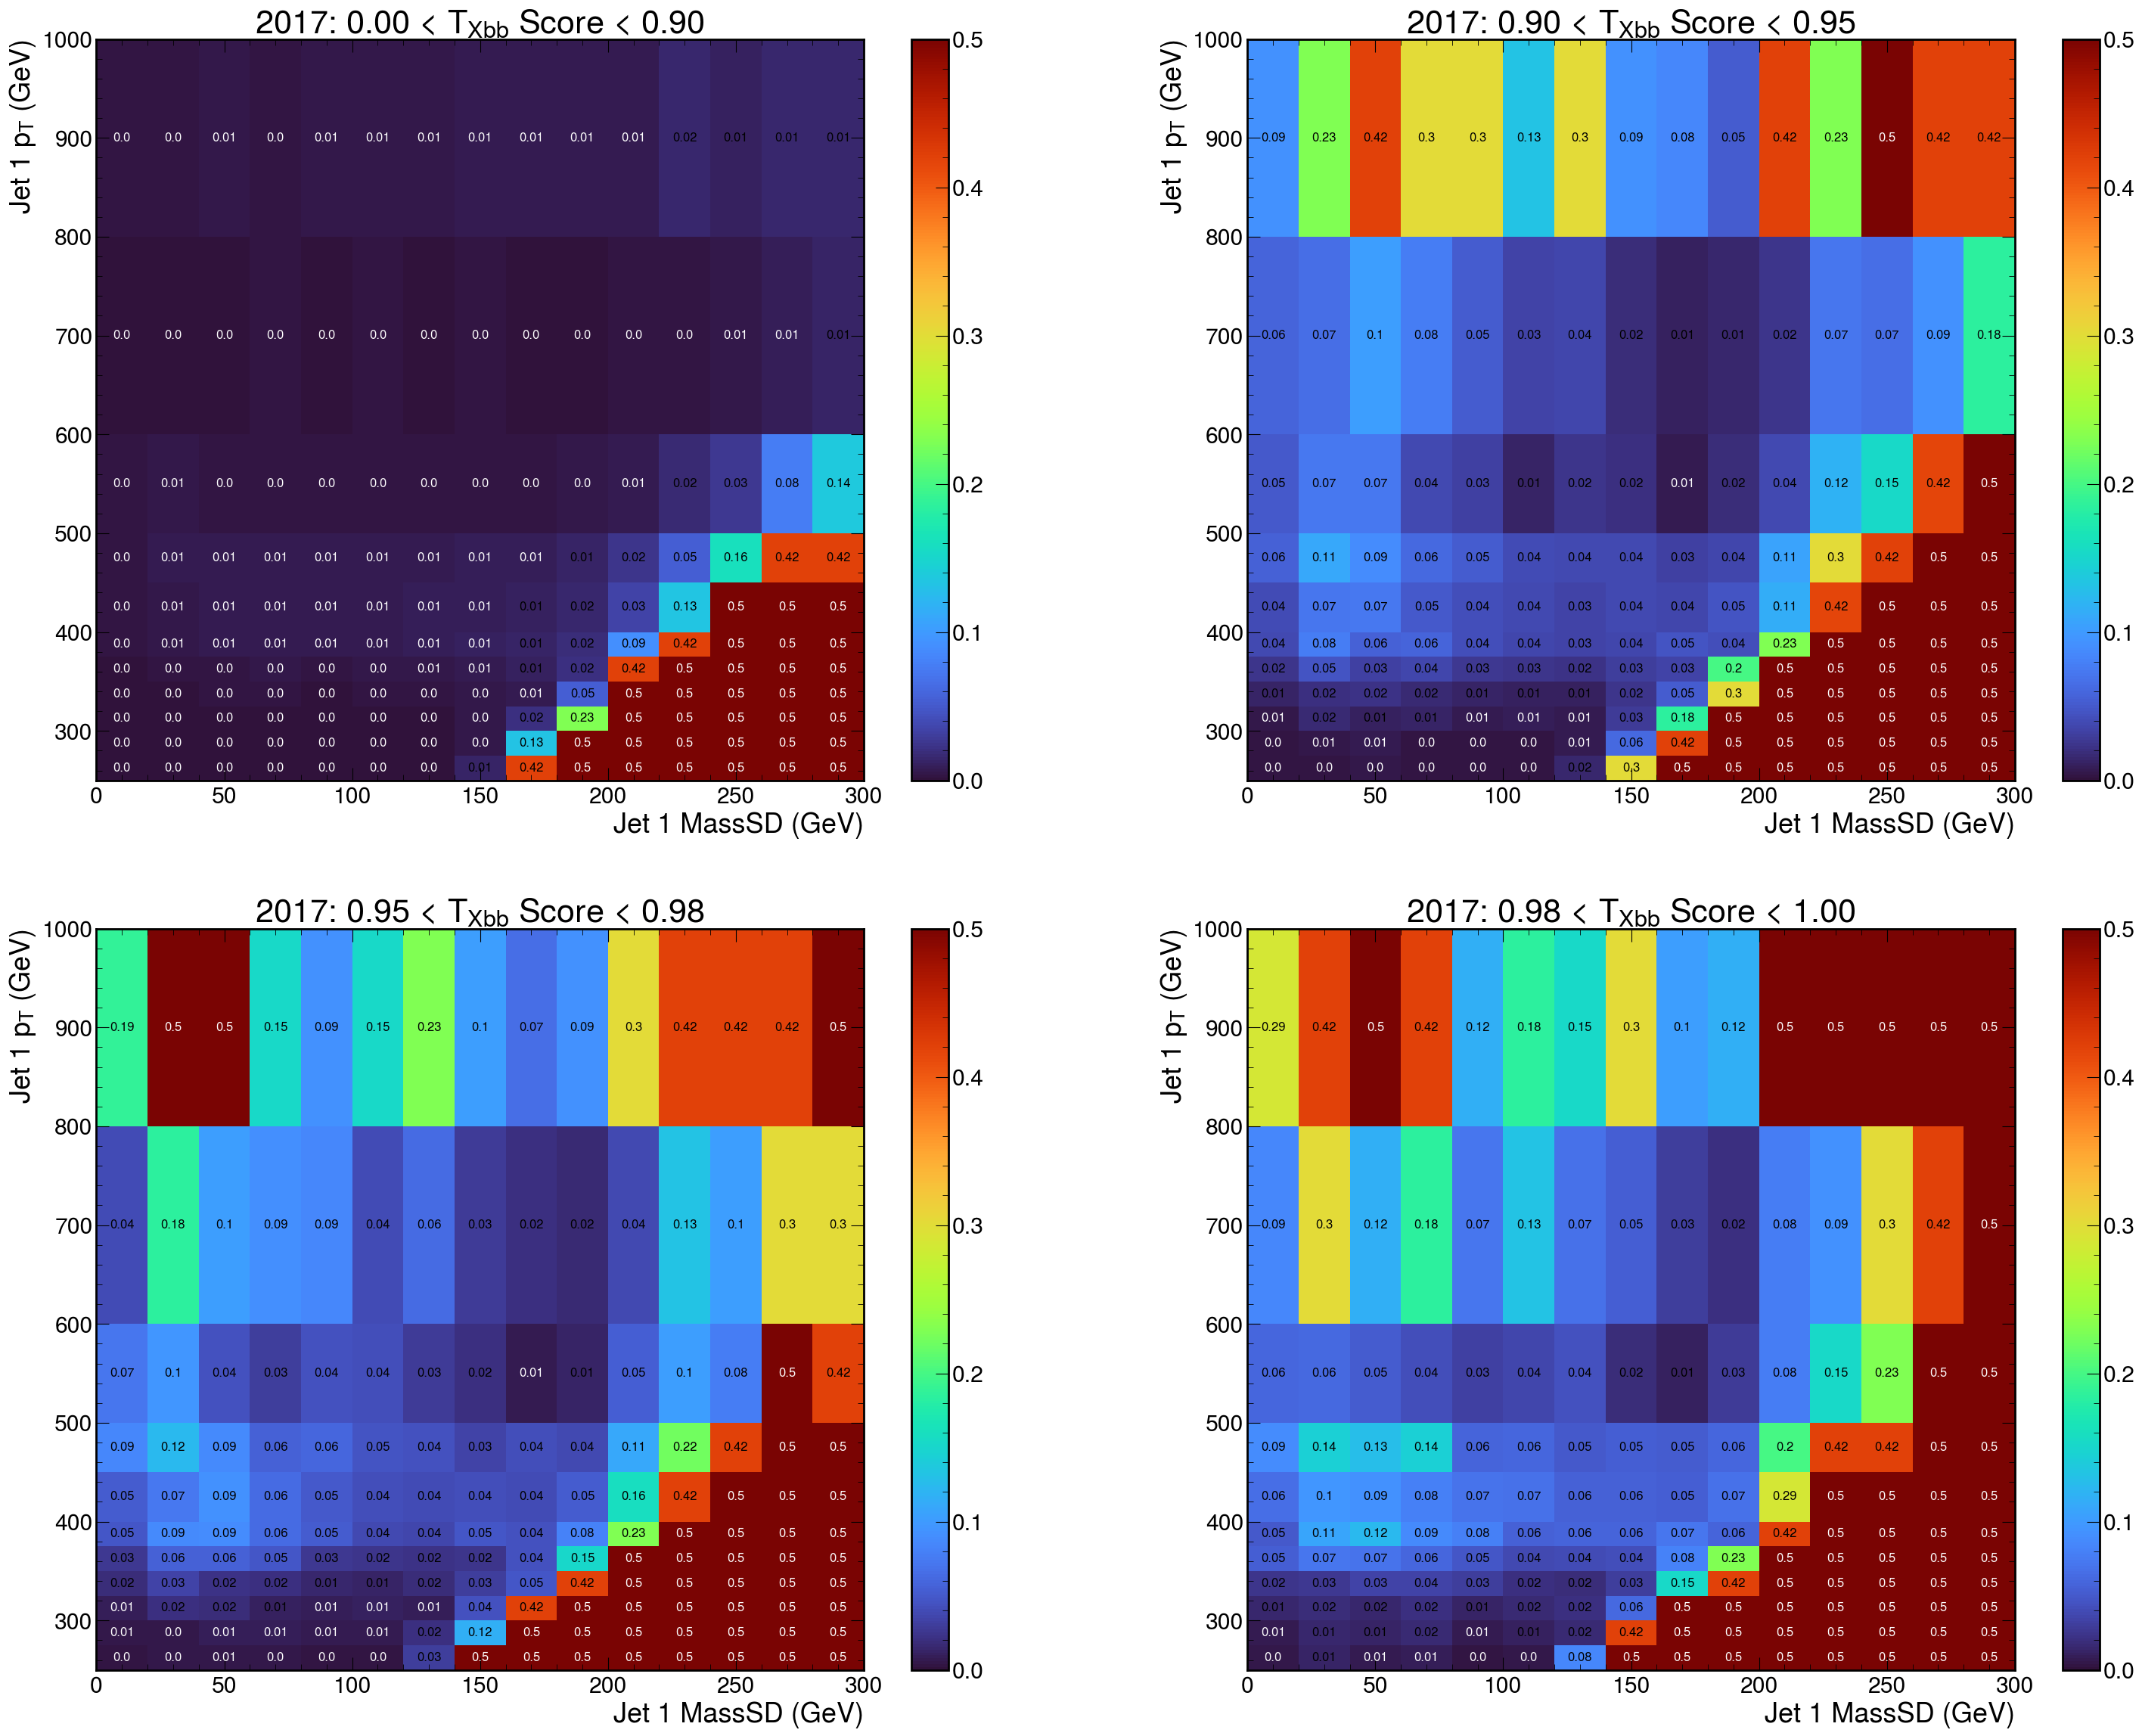

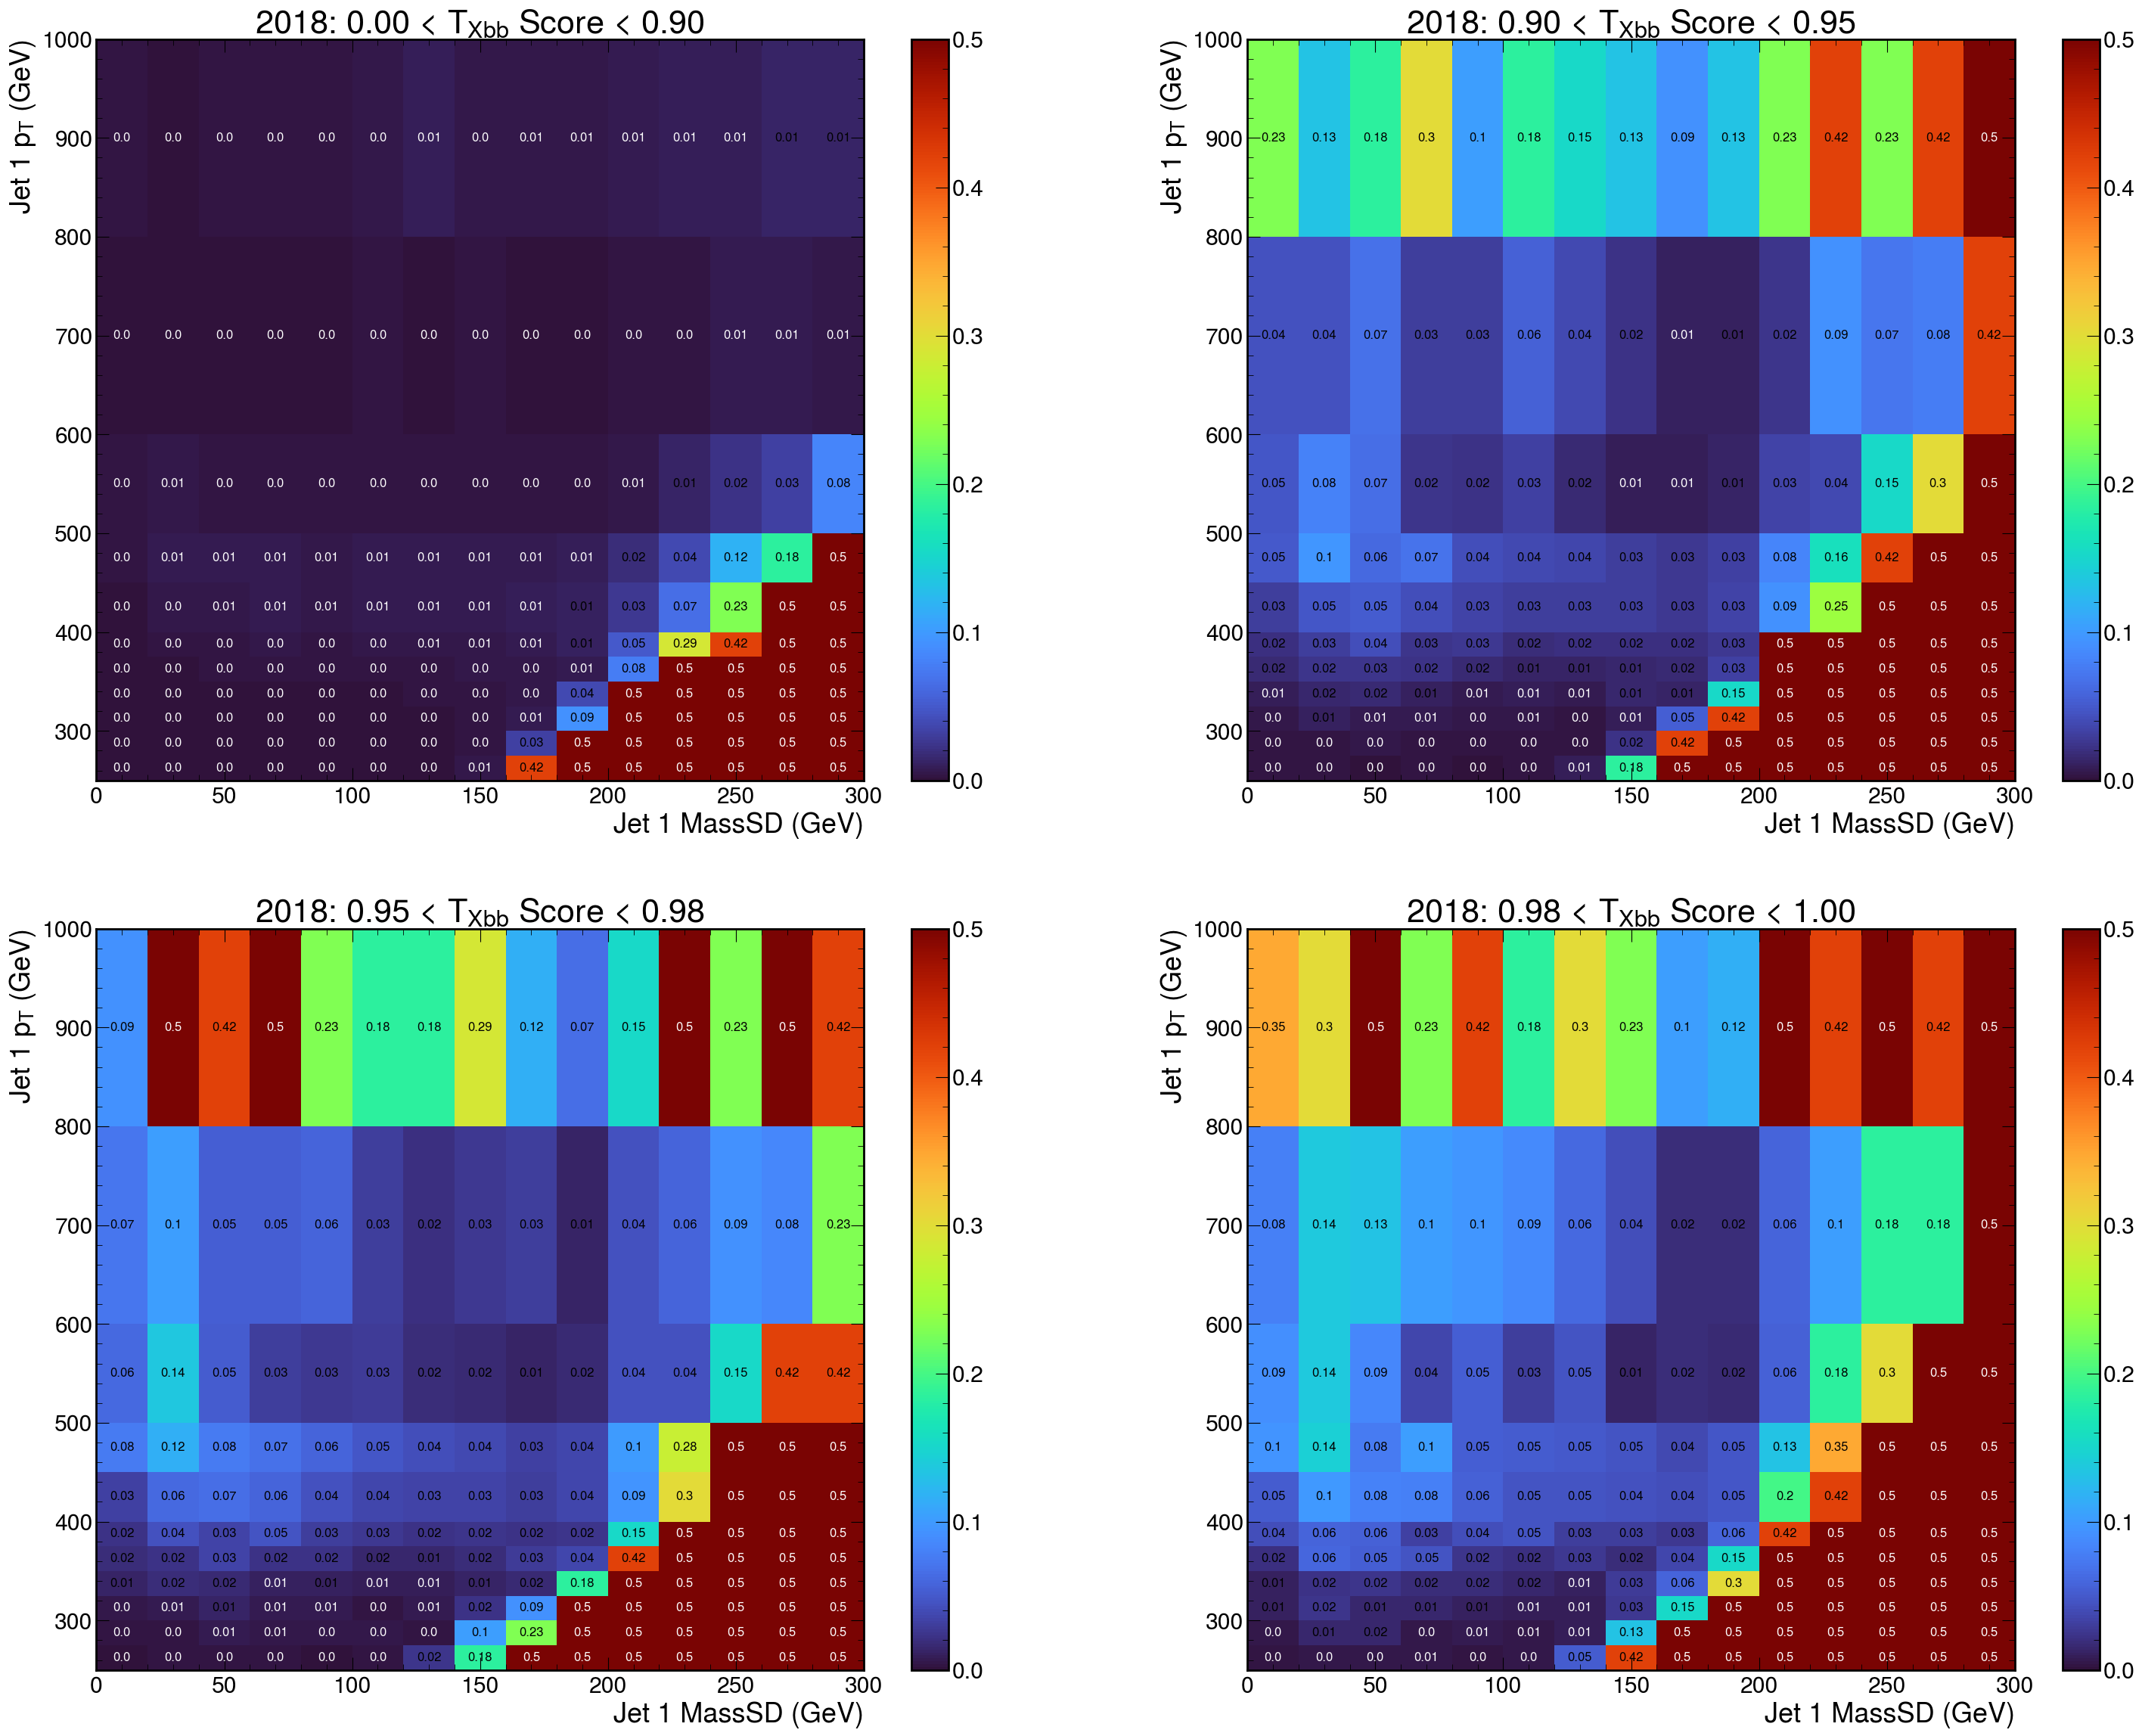

In [22]:
for year in years:
    _, jet1txbbbins, jet1ptbins, jet1msdbins = effs_txbb[year].to_numpy()
    w = errors_txbb[year]

    fig, axs = plt.subplots(2, 2, figsize=(18 * 2, 14 * 2))

    for k in range(len(jet1txbbbins) - 1):
        row = k // 2
        col = k % 2
        ax = axs[row][col]

        mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="turbo", vmin=0, vmax=0.5)
        for i in range(len(jet1ptbins) - 1):
            for j in range(len(jet1msdbins) - 1):
                if not math.isnan(w[k][i, j]):
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        w[k][i, j].round(2),
                        color="black" if 0.01 < w[k][i, j] < 0.45 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

        ax.set_title(
            rf"{year}: {jet1txbbbins[k]:.2f} < $T_{{Xbb}}$ Score < {jet1txbbbins[k + 1]:.2f}"
        )
        ax.set_xlabel("Jet 1 MassSD (GeV)")
        ax.set_ylabel("Jet 1 $p_T$ (GeV)")
        plt.colorbar(mesh, ax=ax)

    plt.savefig(
        f"{plot_dir}/{year}_txbb_errs.pdf",
        bbox_inches="tight",
    )
    # plt.close()

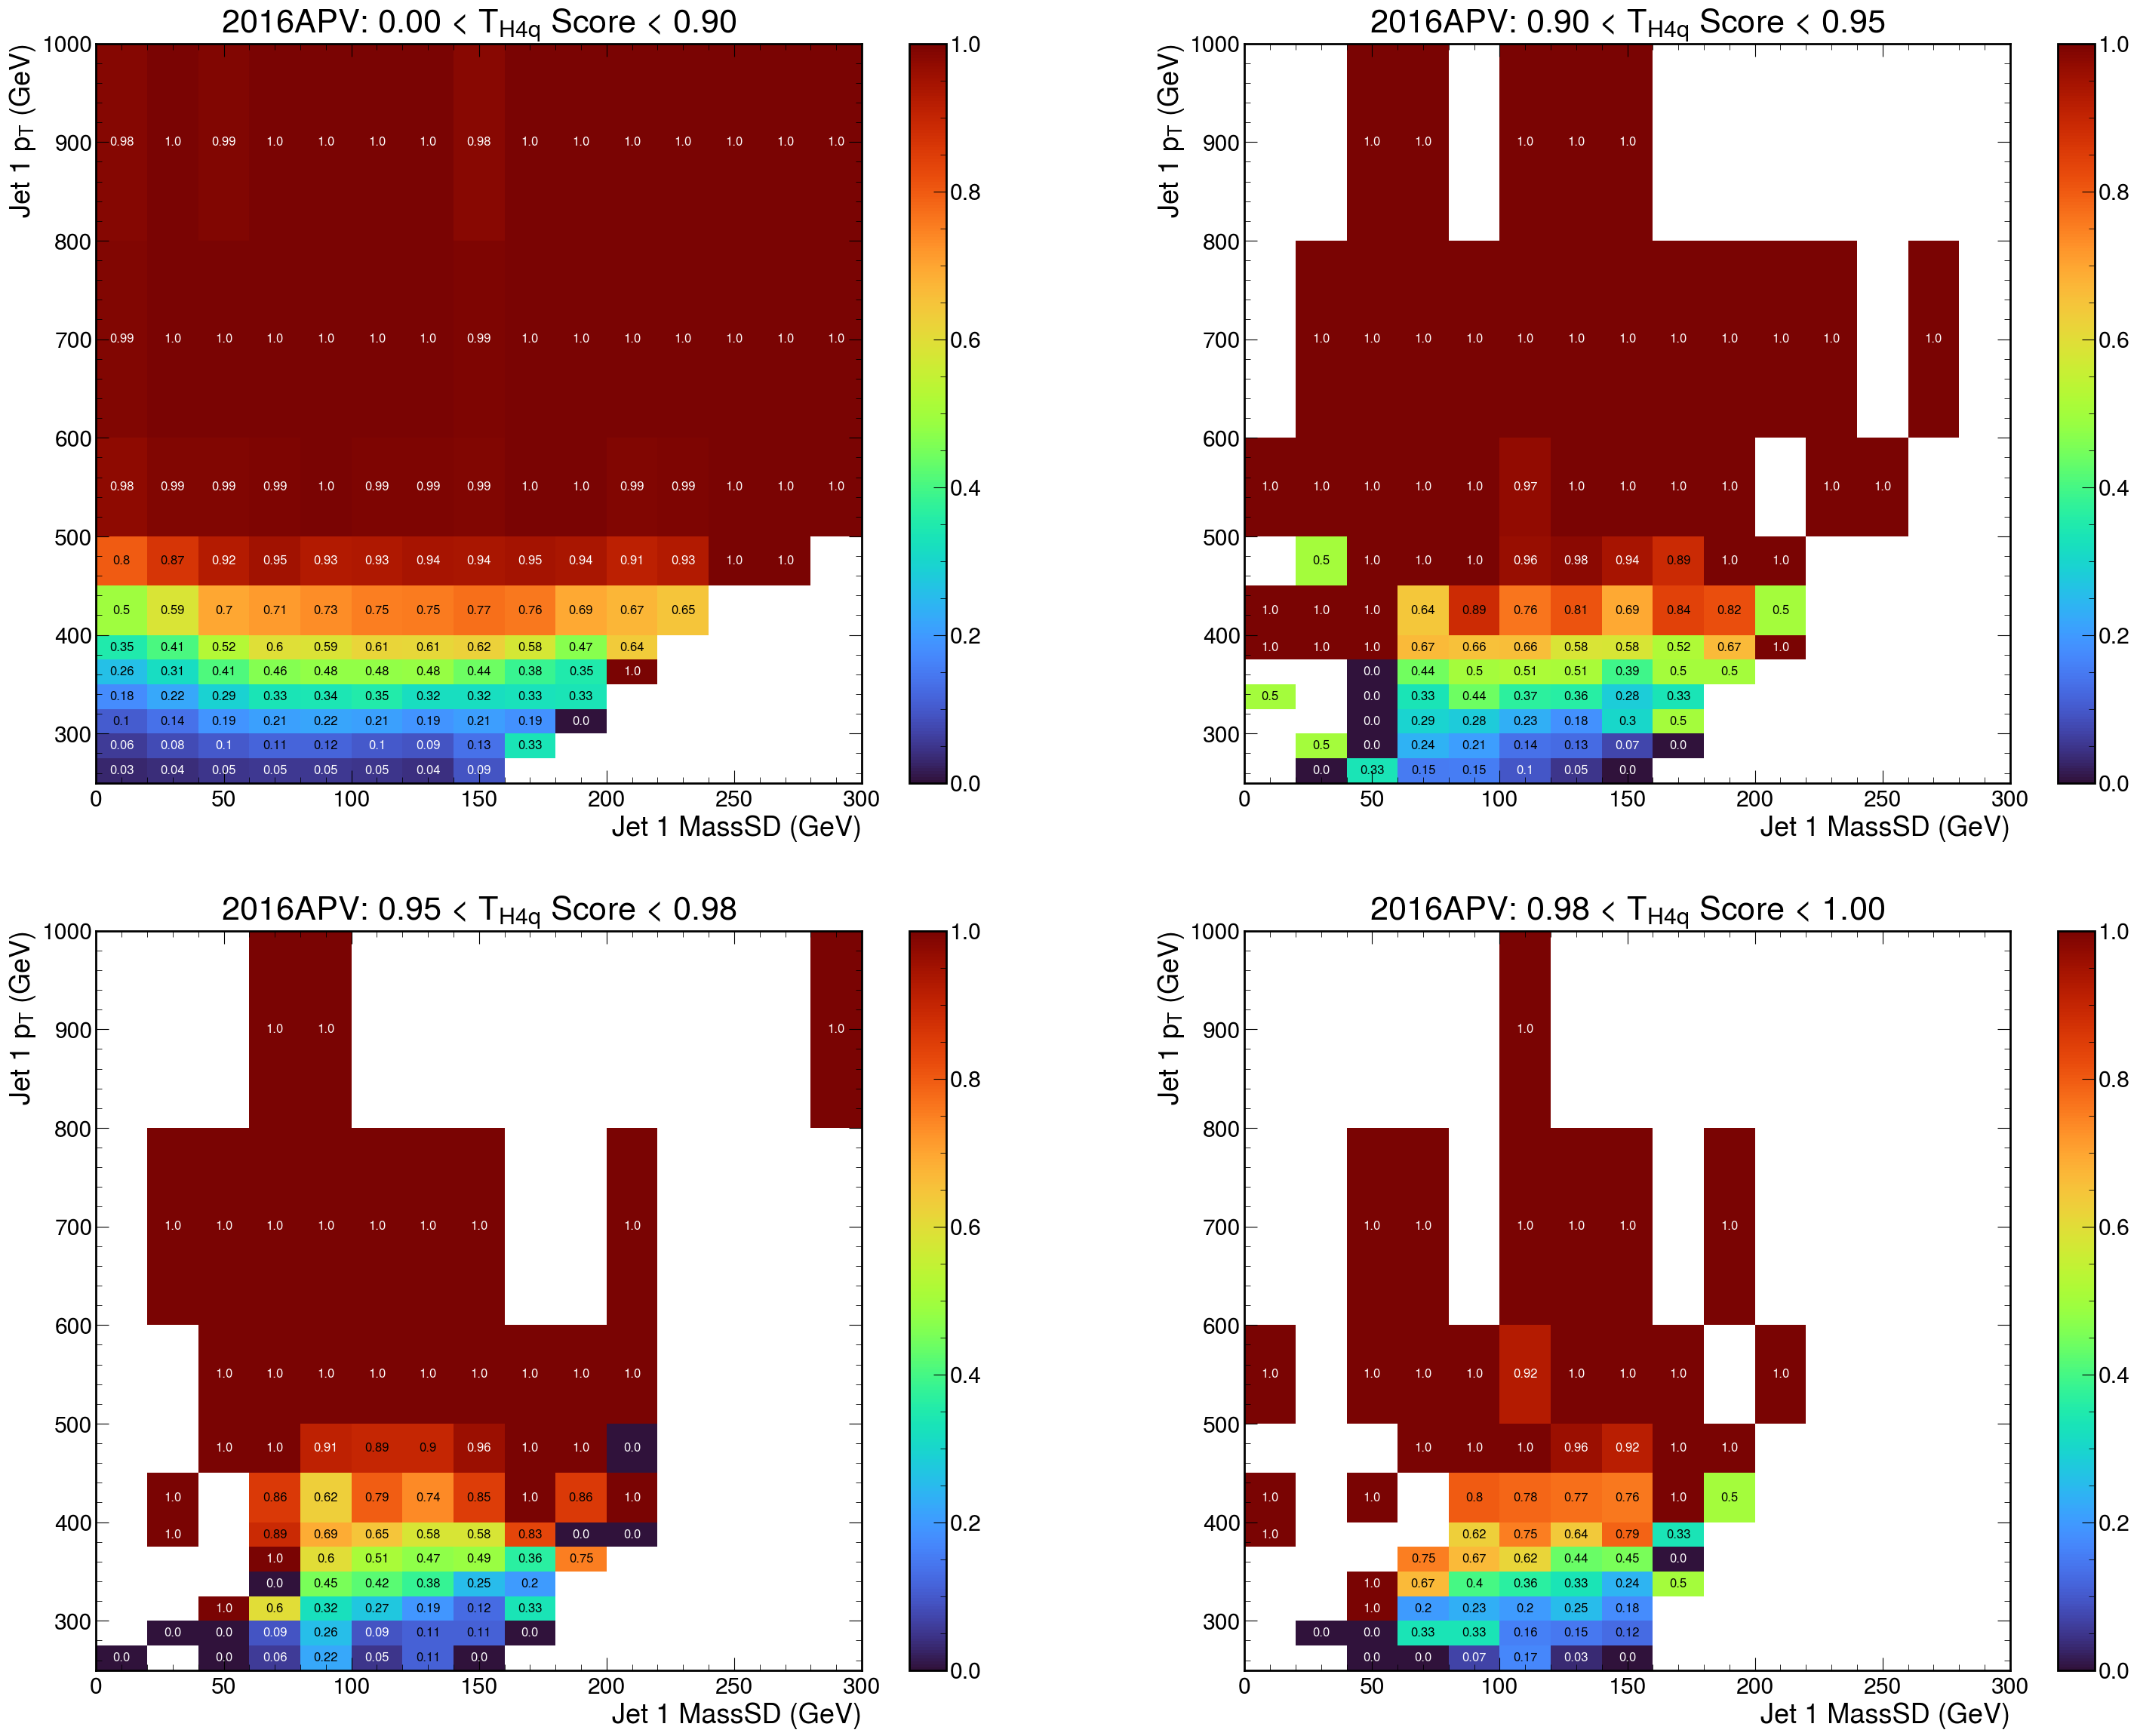

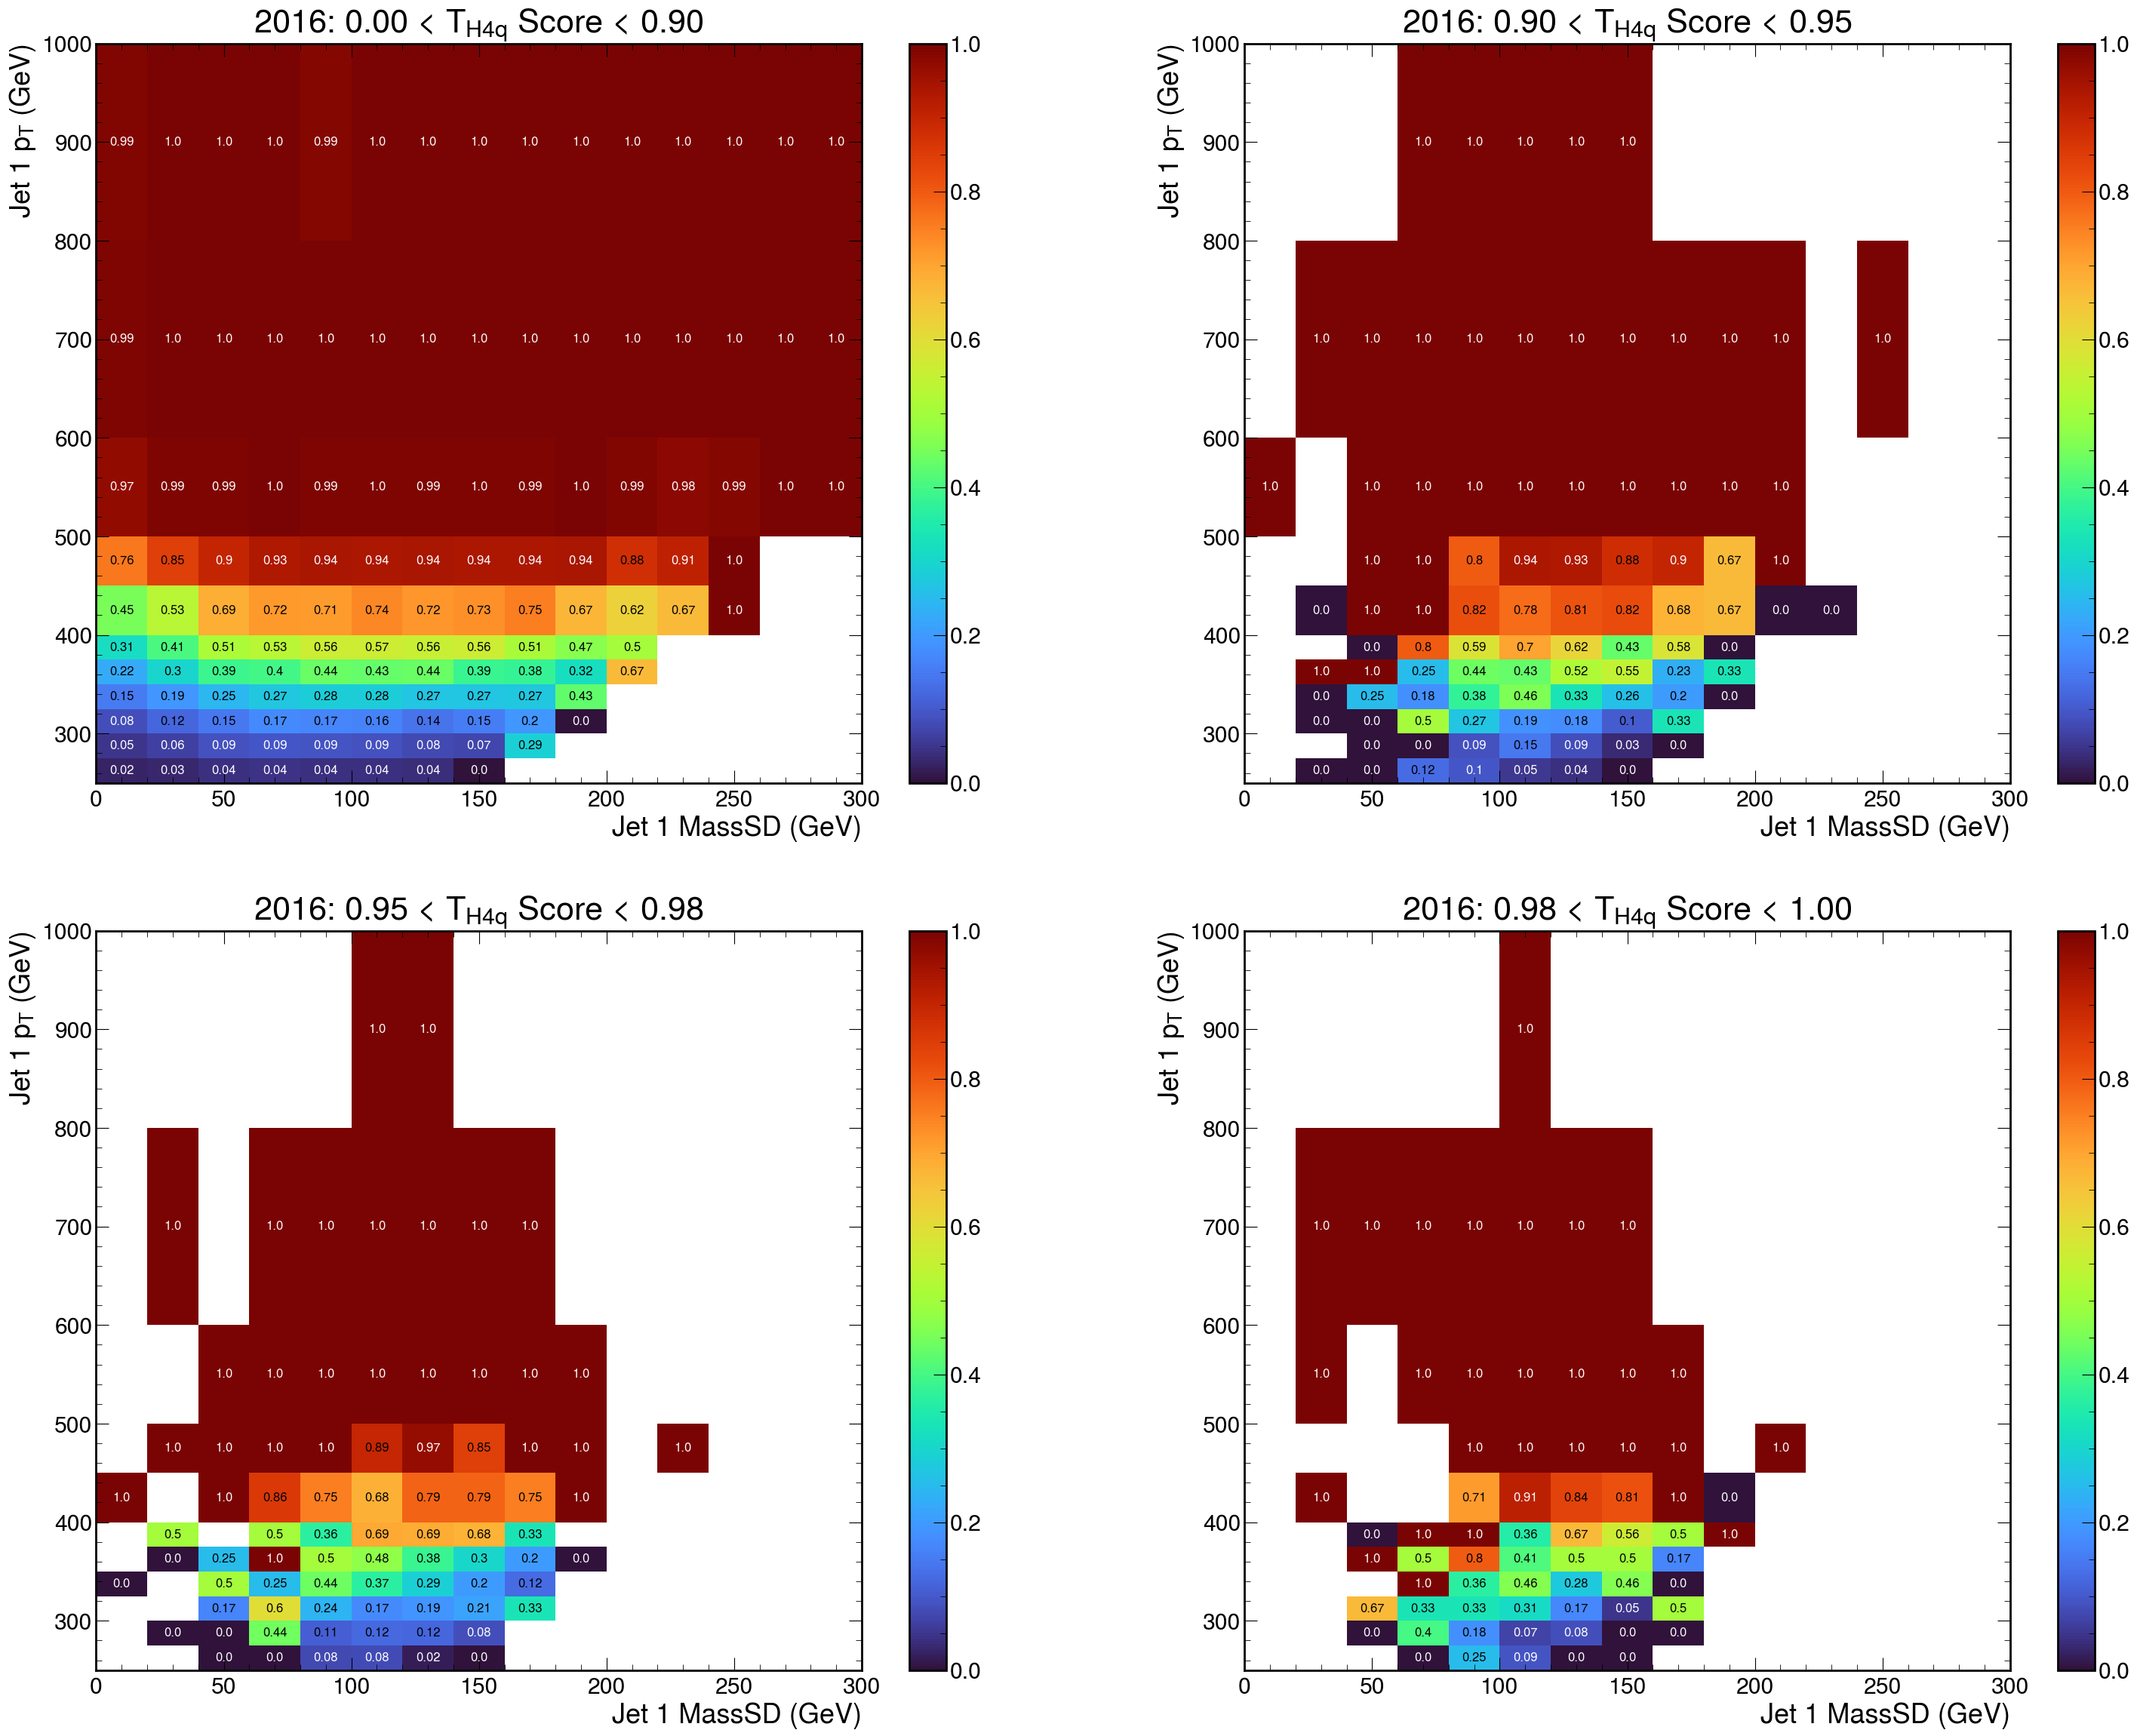

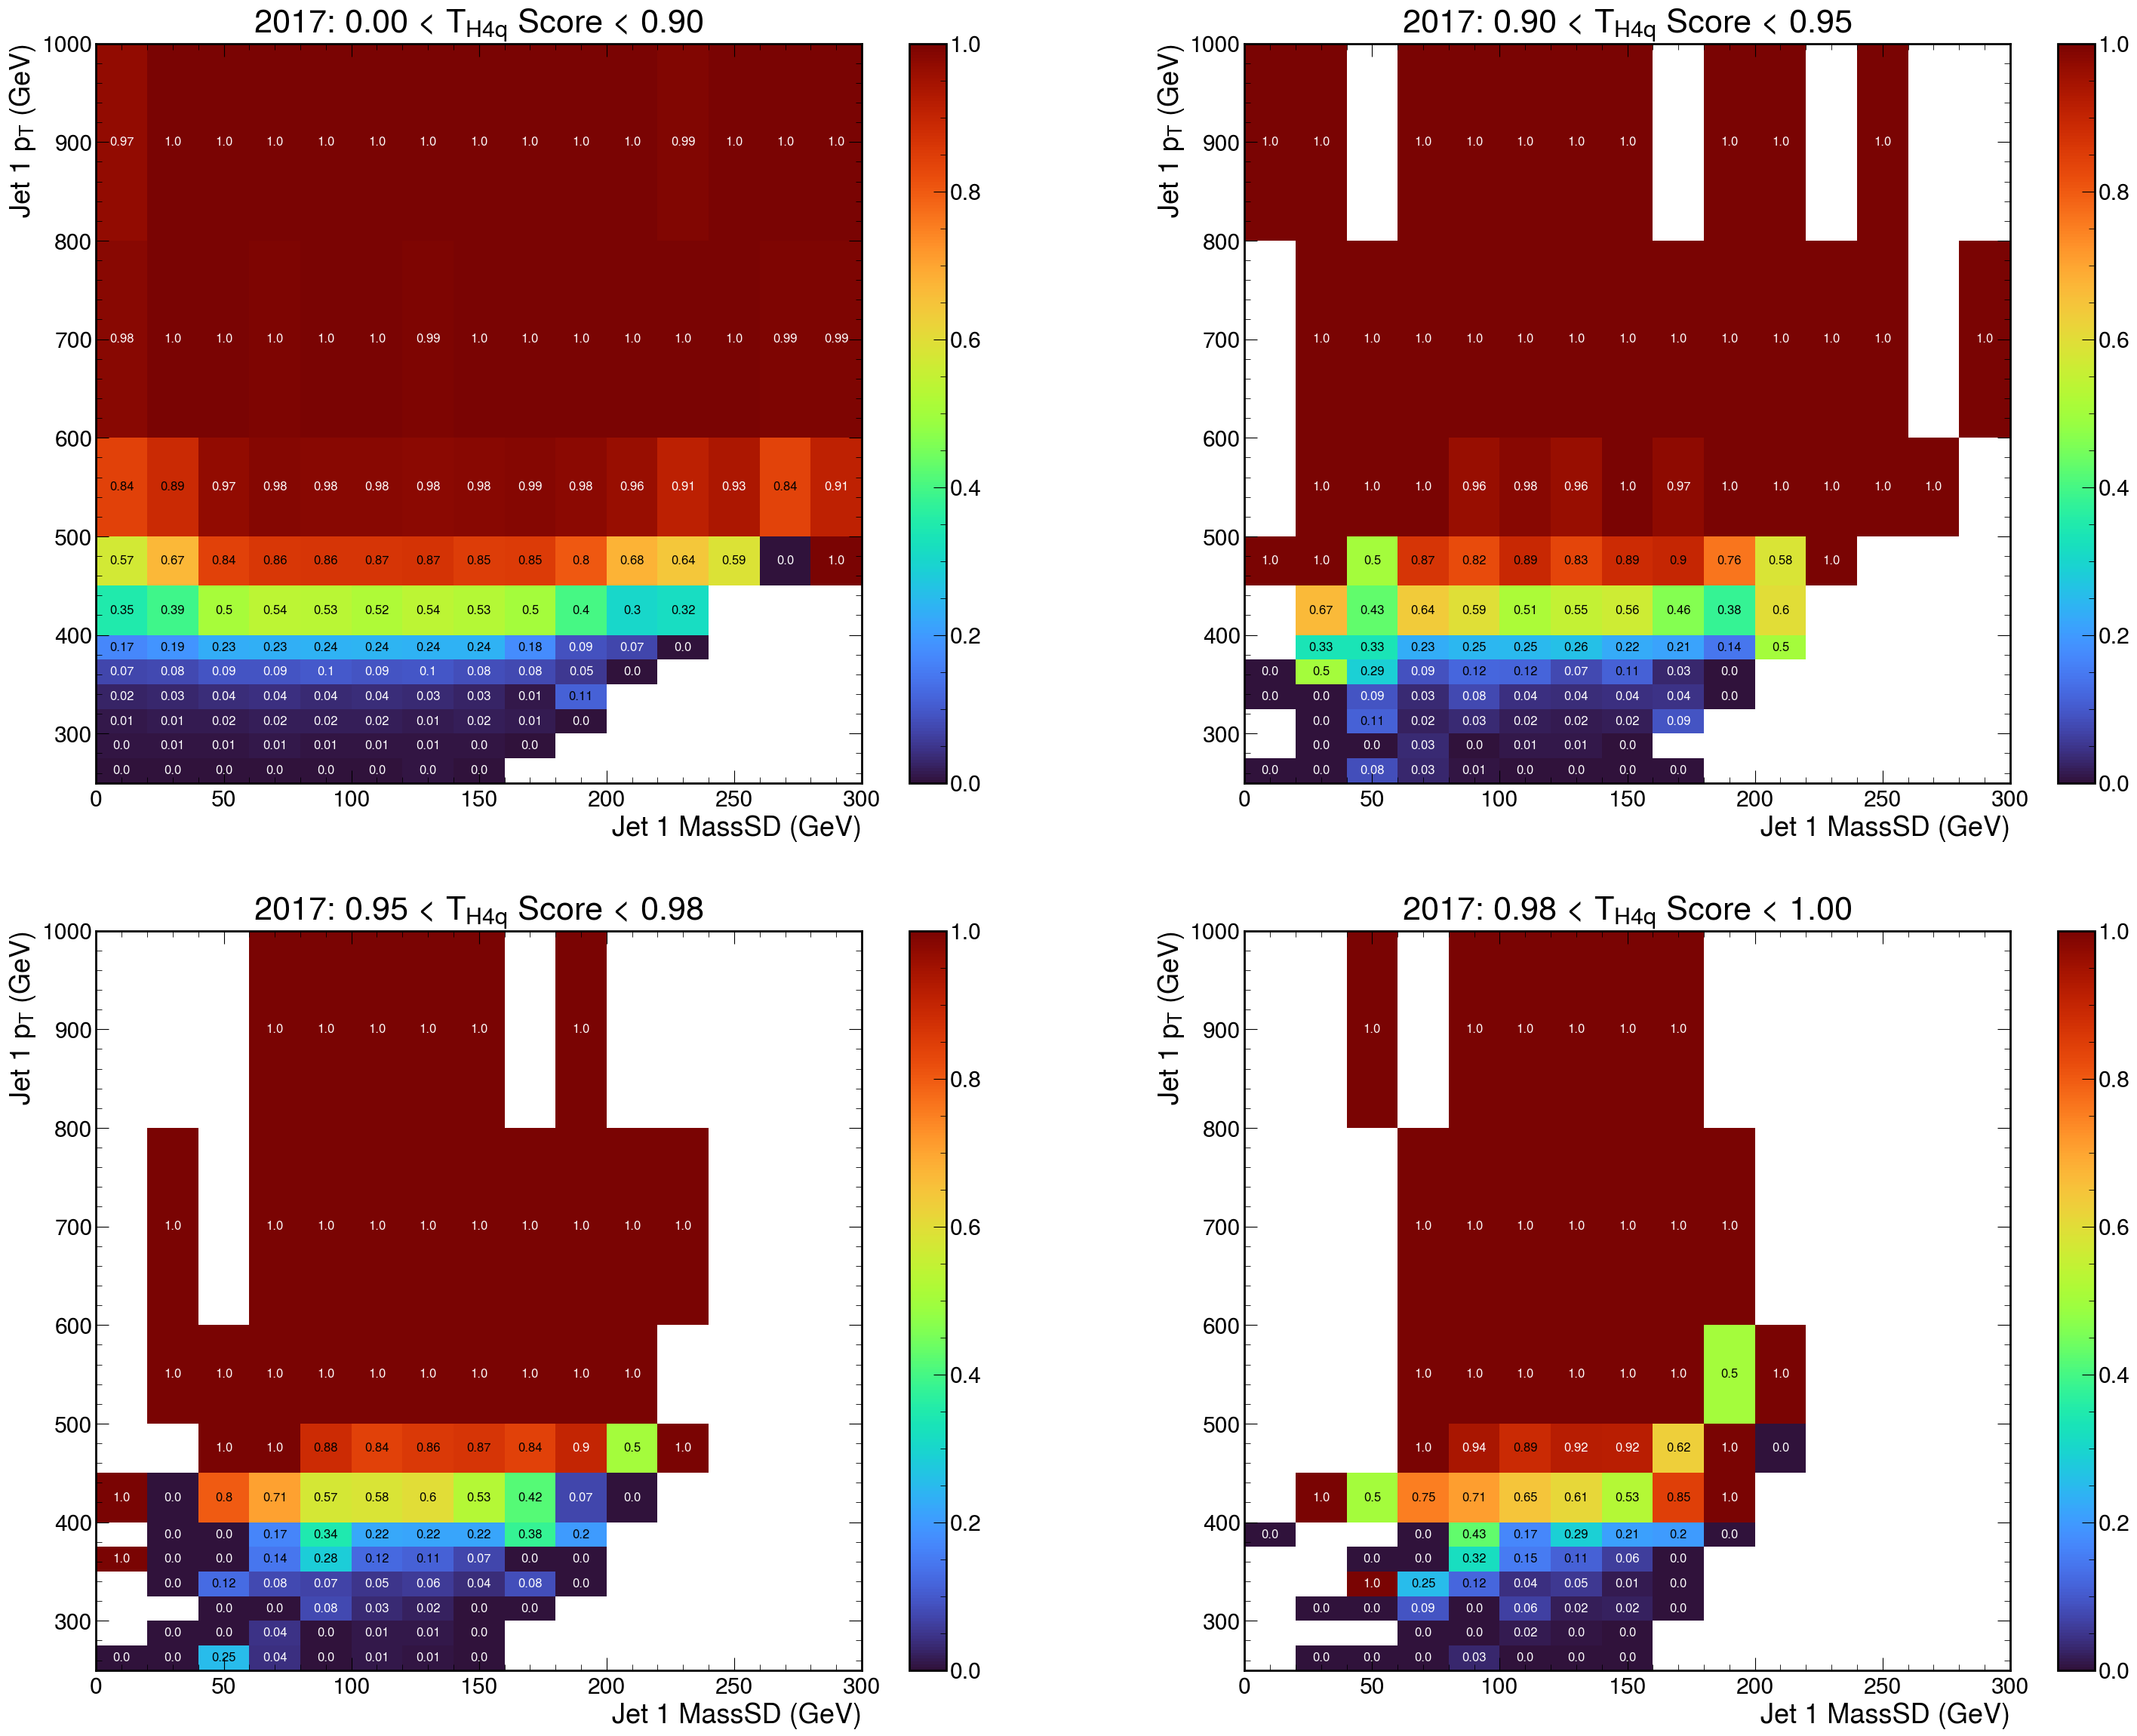

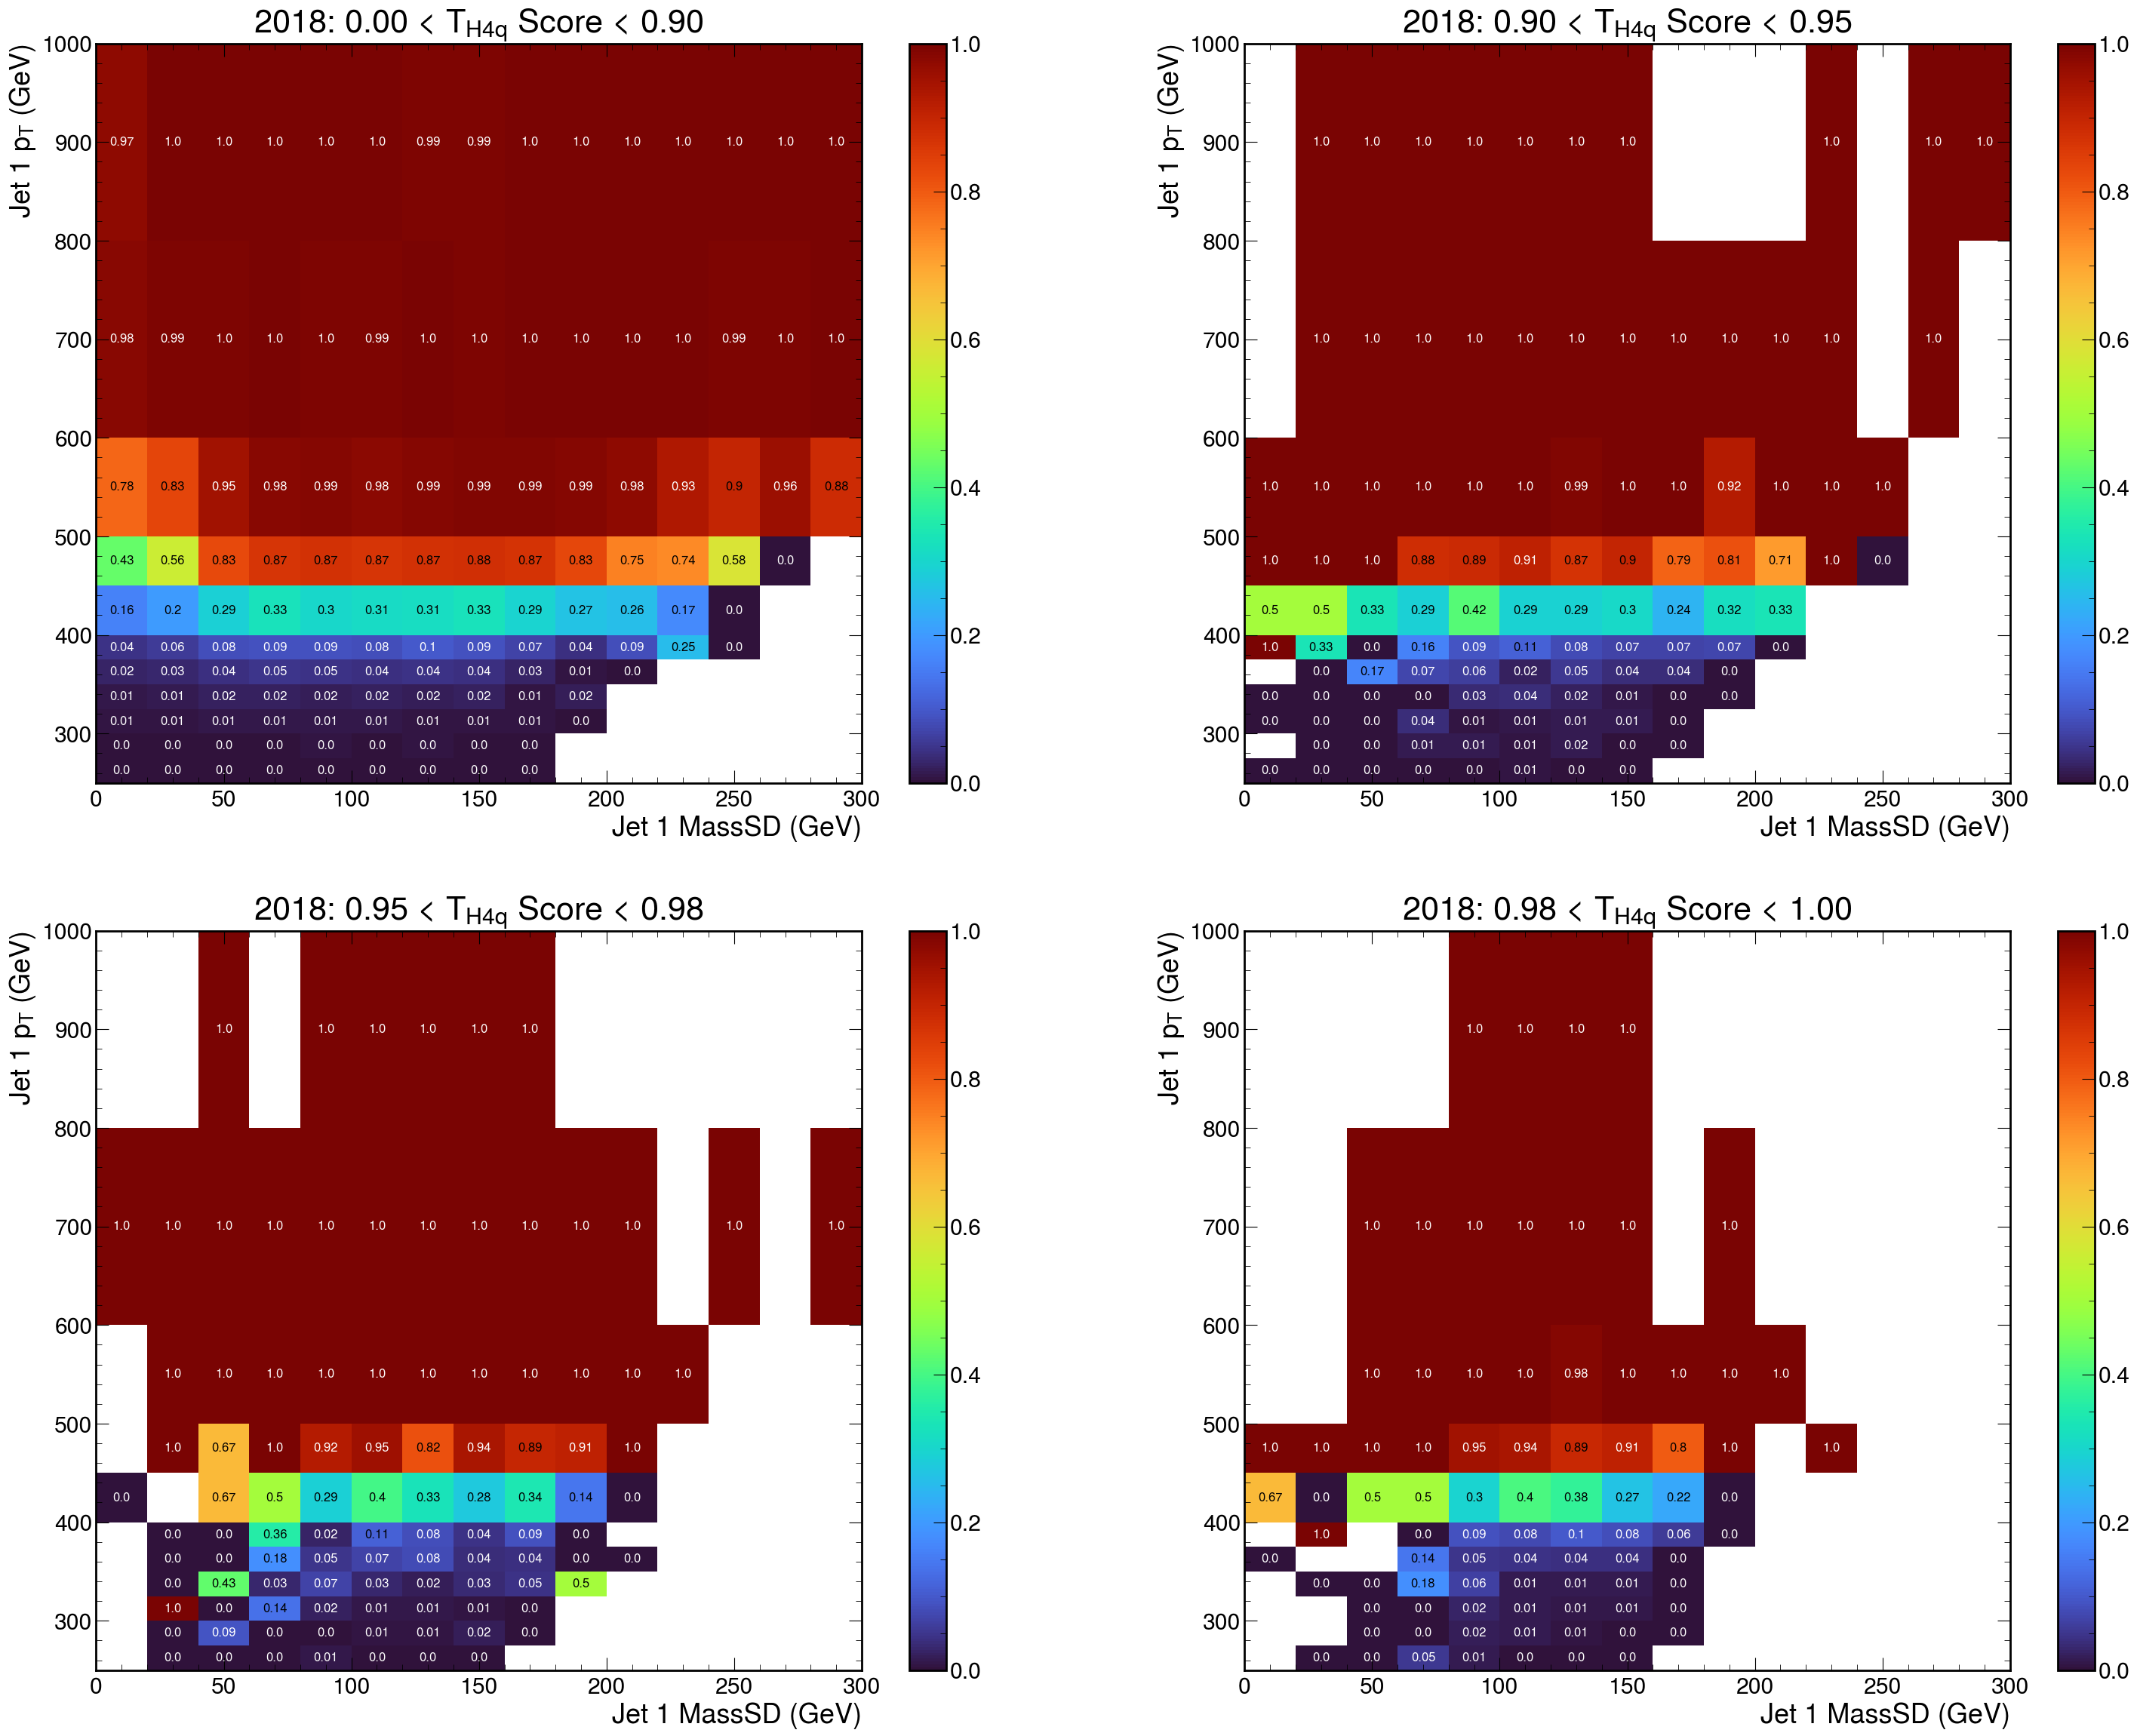

In [24]:
for year in years:
    w, jet1th4qbins, jet1ptbins, jet1msdbins = effs_th4q[year].to_numpy()

    fig, axs = plt.subplots(2, 2, figsize=(18 * 2, 14 * 2))

    for k in range(len(jet1th4qbins) - 1):
        row = k // 2
        col = k % 2
        ax = axs[row][col]

        mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="turbo", vmin=0, vmax=1)
        for i in range(len(jet1ptbins) - 1):
            for j in range(len(jet1msdbins) - 1):
                if not math.isnan(w[k][i, j]):
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        w[k][i, j].round(2),
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

        ax.set_title(
            f"{year}: {jet1th4qbins[k]:.2f} < $T_{{H4q}}$ Score < {jet1th4qbins[k + 1]:.2f}"
        )
        ax.set_xlabel("Jet 1 MassSD (GeV)")
        ax.set_ylabel("Jet 1 $p_T$ (GeV)")
        plt.colorbar(mesh, ax=ax)

    plt.savefig(
        f"{plot_dir}/{year}_th4q_effs.pdf",
        bbox_inches="tight",
    )
    # plt.close()

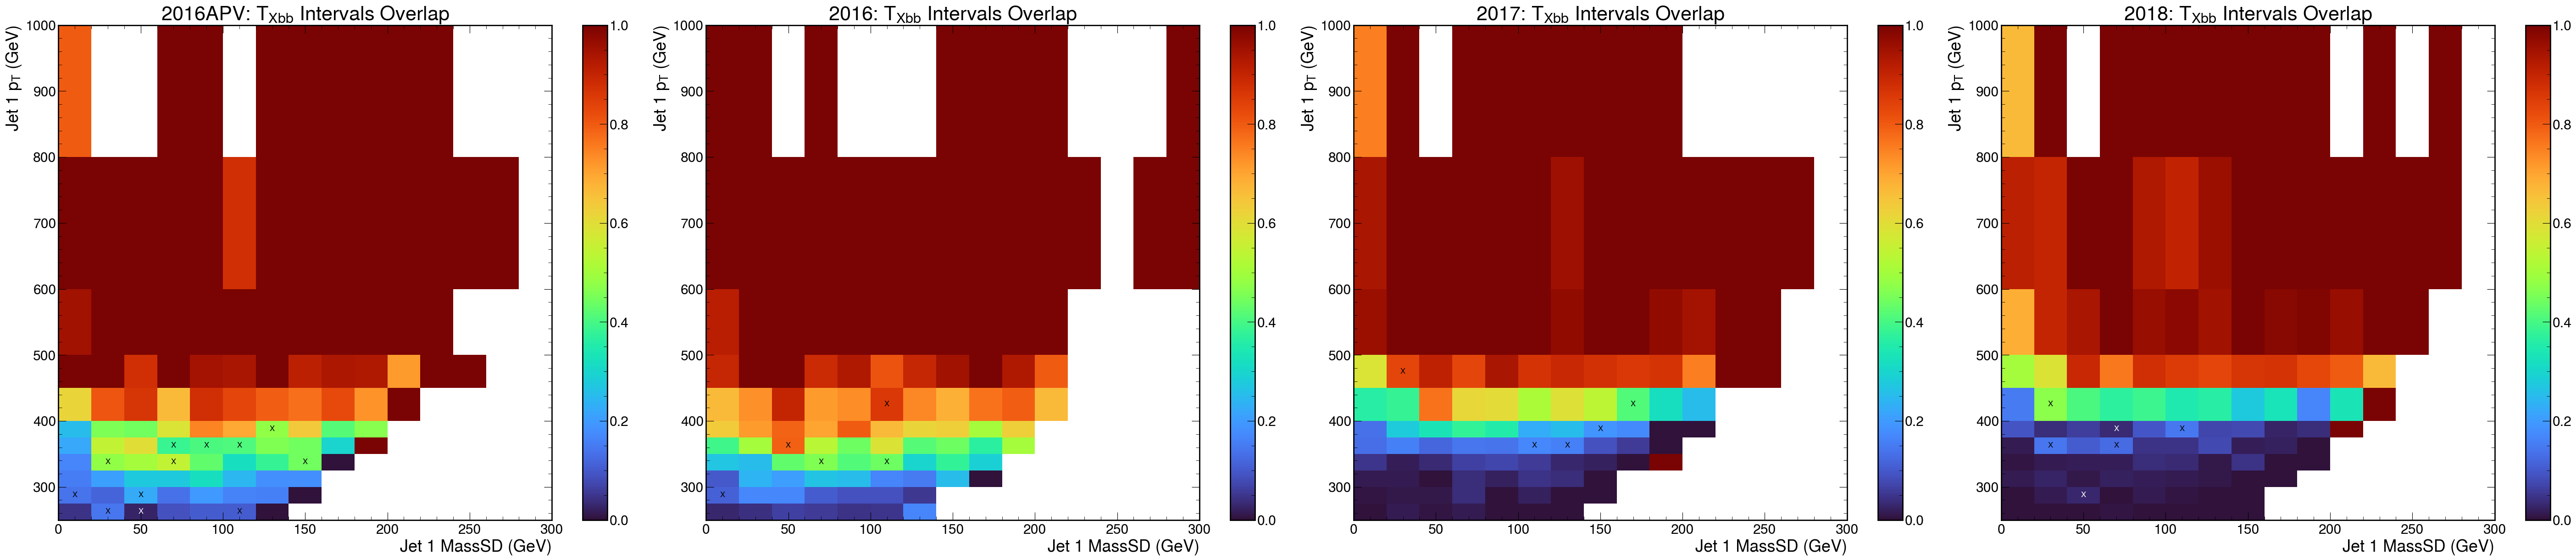

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(18 * 4, 14), gridspec_kw={"wspace": 0.05})

for i, year in enumerate(years):
    ax = axs[i]
    w, jet1txbbbins, jet1ptbins, jet1msdbins = effs_txbb[year].to_numpy()
    overlap = (intervals_txbb[year][0, 3] <= intervals_txbb[year][1, 2]) * (
        intervals_txbb[year][1, 3] >= intervals_txbb[year][0, 2]
    )

    mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[3], cmap="turbo", vmin=0, vmax=1)
    for i in range(len(jet1ptbins) - 1):
        for j in range(len(jet1msdbins) - 1):
            if not math.isnan(w[3][i, j]):
                if overlap[i, j] == 0:
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        "X",
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

    ax.set_title(f"{year}: $T_{{Xbb}}$ Intervals Overlap")
    ax.set_xlabel("Jet 1 MassSD (GeV)")
    ax.set_ylabel("Jet 1 $p_T$ (GeV)")
    plt.colorbar(mesh, ax=ax)

plt.savefig(f"{plot_dir}/txbb_overlap.pdf", bbox_inches="tight")

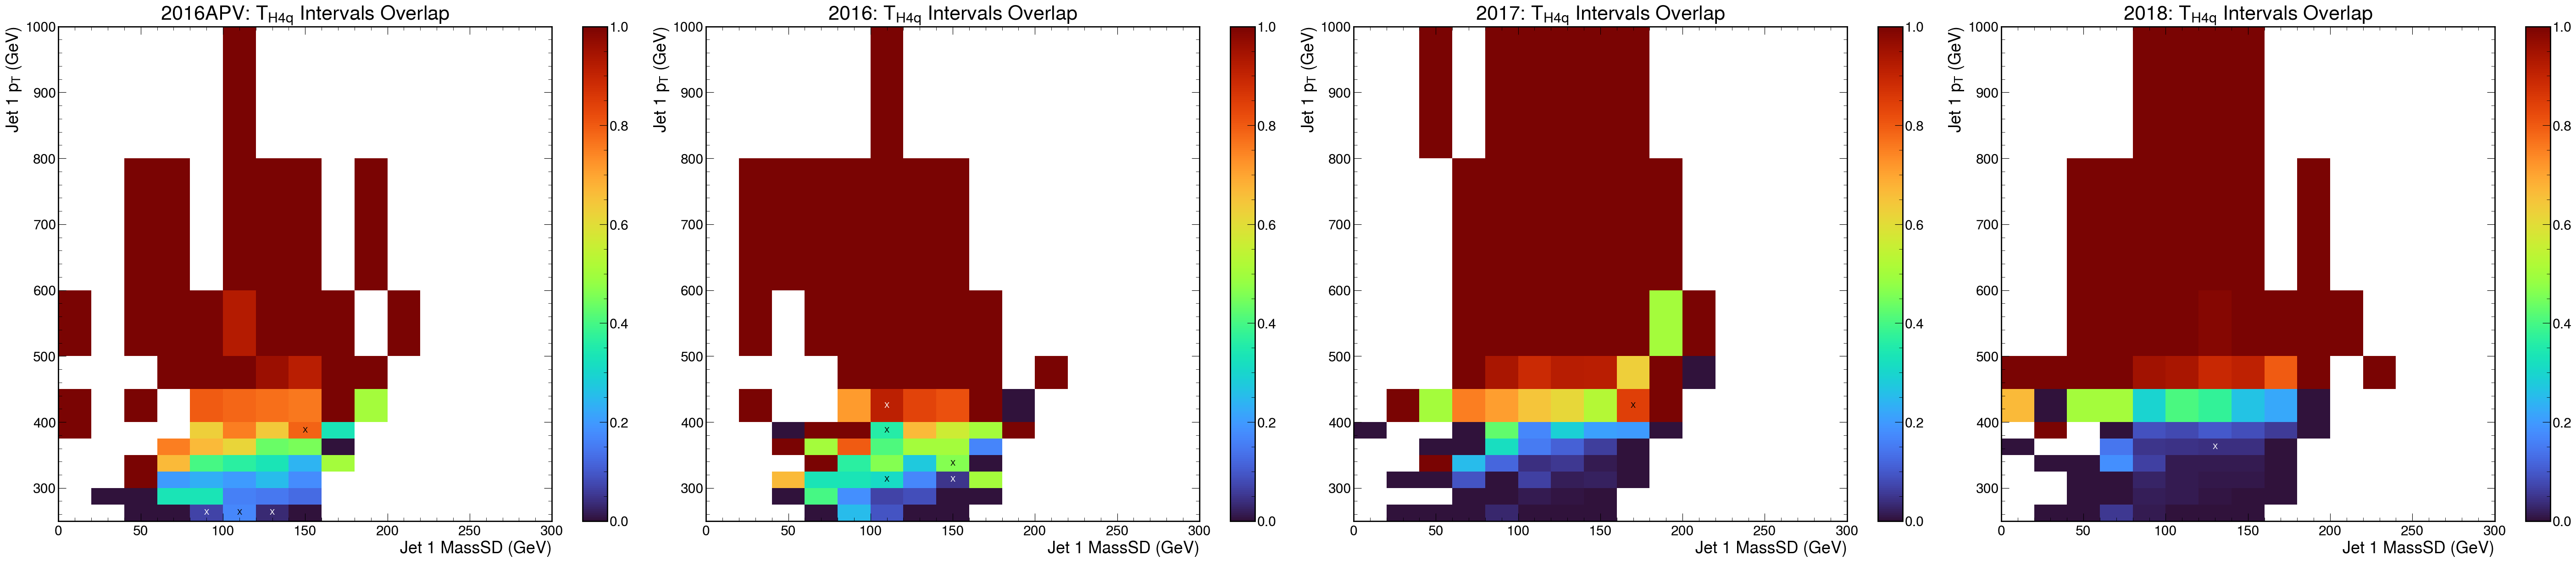

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(18 * 4, 14), gridspec_kw={"wspace": 0.05})

for i, year in enumerate(years):
    ax = axs[i]
    w, jet1th4qbins, jet1ptbins, jet1msdbins = effs_th4q[year].to_numpy()
    overlap = (intervals_th4q[year][0, 3] <= intervals_th4q[year][1, 2]) * (
        intervals_th4q[year][1, 3] >= intervals_th4q[year][0, 2]
    )

    mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[3], cmap="turbo", vmin=0, vmax=1)
    for i in range(len(jet1ptbins) - 1):
        for j in range(len(jet1msdbins) - 1):
            if not math.isnan(w[3][i, j]):
                if overlap[i, j] == 0:
                    ax.text(
                        (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                        (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                        "X",
                        color="black" if 0.1 < w[k][i, j] < 0.9 else "white",
                        ha="center",
                        va="center",
                        fontsize=12,
                    )

    ax.set_title(f"{year}: $T_{{H4q}}$ Intervals Overlap")
    ax.set_xlabel("Jet 1 MassSD (GeV)")
    ax.set_ylabel("Jet 1 $p_T$ (GeV)")
    plt.colorbar(mesh, ax=ax)

plt.savefig(f"{plot_dir}/th4q_overlap.pdf", bbox_inches="tight")